# Exploratory Data Analysis

We have two datasets to work on.
1. Market data (2007 to present) provided by Intrinio - contains financial market information such as opening price, closing price, trading volume, calculated returns, etc.
2. News data (2007 to present) Source: Thomson Reuters - contains information about news articles/alerts published about assets, such as article details, sentiment, and other commentary.

## 1. Market Data

The data includes a subset of US-listed instruments. The set of included instruments changes daily and is determined based on the amount traded and the availability of information. This means that there may be instruments that enter and leave this subset of data. There may therefore be gaps in the data provided, and this does not necessarily imply that that data does not exist (those rows are likely not included due to the selection criteria).

The marketdata contains a variety of returns calculated over different timespans.

Within the marketdata, you will find the following columns: <br>

- time(datetime64[ns, UTC]) - the current time (in marketdata, all rows are taken at 22:00 UTC) <br>
- assetCode(object) - a unique id of an asset<br>
- assetName(category) - the name that corresponds to a group of assetCodes. These may be "Unknown" if the corresponding assetCode does not have any rows in the news data.<br>
- universe(float64) - a boolean indicating whether or not the instrument on that day will be included in scoring. This value is not provided outside of the training data time period. The trading universe on a given date is the set of instruments that are avilable for trading (the scoring function will not consider instruments that are not in the trading universe). The trading universe changes daily. <br>
- volume(float64) - trading volume in shares for the day <br>
- close(float64) - the close price for the day (not adjusted for splits or dividends) <br>
- open(float64) - the open price for the day (not adjusted for splits or dividends) <br>
- returnsClosePrevRaw1(float64) - see returns explanation above<br>
- returnsOpenPrevRaw1(float64) - see returns explanation above<br>
- returnsClosePrevMktres1(float64) - see returns explanation above<br>
- returnsOpenPrevMktres1(float64) - see returns explanation above<br>
- returnsClosePrevRaw10(float64) - see returns explanation above<br>
- returnsOpenPrevRaw10(float64) - see returns explanation above<br>
- returnsClosePrevMktres10(float64) - see returns explanation above<br>
- returnsOpenPrevMktres10(float64) - see returns explanation above<br>
- returnsOpenNextMktres10(float64) - 10 day, market-residualized return. This is the target variable used in competition scoring. The market data has been filtered such that returnsOpenNextMktres10 is always not null.

In [6]:
import pandas as pd
df1 = pd.read_csv("market_train1.csv")
df2 = pd.read_csv("market_train2.csv")
df3 = pd.read_csv("market_train3.csv")
df4 = pd.read_csv("market_train4.csv")
df5 = pd.read_csv("market_train5.csv")
market_data = pd.concat([df1,df2,df3,df4,df5])

In [31]:
market_data.head()

,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0
1,1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0
2,2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0
3,3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0
4,4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0


### 1.1 Data shapes and types

In [7]:
market_data.head() #I observe last row of data is missing compared to Kaggle Kernel

,index,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,0,2007-02-01 22:00:00.000000,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0
1,1,2007-02-01 22:00:00.000000,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0
2,2,2007-02-01 22:00:00.000000,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0
3,3,2007-02-01 22:00:00.000000,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0
4,4,2007-02-01 22:00:00.000000,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0


In [8]:
del market_data['index']

In [9]:
market_data.shape

(4072955, 16)

In [10]:
market_data['time'] = pd.to_datetime(market_data['time'])
market_data['assetName'] = market_data['assetName'].astype('category')

In [11]:
market_data.dtypes

time                        datetime64[ns]
assetCode                           object
assetName                         category
volume                             float64
close                              float64
open                               float64
returnsClosePrevRaw1               float64
returnsOpenPrevRaw1                float64
returnsClosePrevMktres1            float64
returnsOpenPrevMktres1             float64
returnsClosePrevRaw10              float64
returnsOpenPrevRaw10               float64
returnsClosePrevMktres10           float64
returnsOpenPrevMktres10            float64
returnsOpenNextMktres10            float64
universe                           float64
dtype: object

Time ==> DateTime <br>
AssetCode ==> Object <br>
AssetName ==> Category <br>
Rest all our float

### 1.2 Check for Missing Values

In [12]:
market_data.isna().sum()

time                            0
assetCode                       0
assetName                       0
volume                          0
close                           0
open                            0
returnsClosePrevRaw1            0
returnsOpenPrevRaw1             0
returnsClosePrevMktres1     15980
returnsOpenPrevMktres1      15988
returnsClosePrevRaw10           0
returnsOpenPrevRaw10            0
returnsClosePrevMktres10    93010
returnsOpenPrevMktres10     93054
returnsOpenNextMktres10         0
universe                        0
dtype: int64

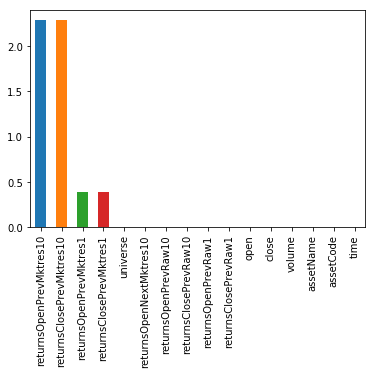

In [8]:
import matplotlib as plt
((market_data.isnull().sum()/market_data.shape[0])*100).sort_values(ascending=False).plot(kind='bar')

### 1.3 Check for Unique Values

In [36]:
market_data.nunique()

time                           2498
assetCode                      3780
assetName                      3511
volume                      2392151
close                         55434
open                          46627
returnsClosePrevRaw1        2903233
returnsOpenPrevRaw1         2866949
returnsClosePrevMktres1     4056916
returnsOpenPrevMktres1      4056909
returnsClosePrevRaw10       3416980
returnsOpenPrevRaw10        3380333
returnsClosePrevMktres10    3979920
returnsOpenPrevMktres10     3979901
returnsOpenNextMktres10     4072955
universe                          2
dtype: int64

### 1.4 Data Time Period

In [37]:
print("Min date: ",market_data['time'].min())
print("Max date: ",market_data['time'].max())

Min date:  2007-02-01 22:00:00
Max date:  2016-12-30 22:00:00


### 1.5 Asset Code & Associated Asset Name

In [38]:
market_data[['assetCode','assetName']].head()

,assetCode,assetName
0,A.N,Agilent Technologies Inc
1,AAI.N,AirTran Holdings Inc
2,AAP.N,Advance Auto Parts Inc
3,AAPL.O,Apple Inc
4,ABB.N,ABB Ltd


We have more asset codes than asset names as seen from analysis in 1.3, which implies that some asset names might have Null/Unknown values

In [39]:
print("Number of unique asset names = ", market_data['assetName'].nunique())
print("Number of unique asset codes = ", market_data['assetCode'].nunique())
print("Number of Unknown asset names = ", abs(market_data['assetName'].nunique()-market_data['assetCode'].nunique()))

Number of unique asset names =  3511
Number of unique asset codes =  3780
Number of Unknown asset names =  269


In [40]:
market_data[market_data['assetName']=='Unknown'].head()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
10,2007-02-01 22:00:00,ABY.N,Unknown,9037700.0,3.17,3.23,-0.024615,0.022152,NaN,NaN,0.178439,0.200743,NaN,NaN,0.016963,0.0
17,2007-02-01 22:00:00,AD.N,Unknown,299100.0,32.80,32.80,0.000610,0.000915,NaN,NaN,0.003058,0.003979,NaN,NaN,0.001977,0.0
245,2007-02-01 22:00:00,CBSS.O,Unknown,496701.0,60.98,60.91,0.001314,0.008945,NaN,NaN,0.008934,0.005613,NaN,NaN,0.078294,1.0
261,2007-02-01 22:00:00,CEI.N,Unknown,609500.0,20.35,20.15,0.014457,0.012563,NaN,NaN,0.064283,0.048977,NaN,NaN,-0.000076,1.0
305,2007-02-01 22:00:00,CMGb.N,Unknown,255400.0,55.57,55.54,0.004156,0.000180,NaN,NaN,-0.007324,-0.008214,NaN,NaN,0.058903,0.0


Following asset codes have 'Unknown' asset names

In [41]:
unknown_assetname_codes=market_data[market_data['assetName']=='Unknown']['assetCode'].unique()
unknown_assetname_codes

array(['ABY.N', 'AD.N', 'CBSS.O', 'CEI.N', 'CMGb.N', 'CMVT.OQ', 'CNE.N',
       'EPIC.O', 'FCL.N', 'IFS.N', 'IPS.N', 'NVL.N', 'OMM.N', 'TSY.N',
       'UCO.N', 'UPL.A', 'RG.N', 'NAVZ.OQ', 'ASPV.O', 'FS.N', 'HBG.N',
       'NTO.A', 'SGG.O', 'WNG.N', 'RNO.A', 'RIN.O', 'MNG.A', 'DAR.A',
       'CUP.A', 'MDG.N', 'NZ.P', 'TOC.N', 'PAR.P', 'MWA/B.N', 'PBR/A.N',
       'RDS/B.N', 'MRB.A', 'MXB.N', 'ABI.N', 'MDRXD.O', 'RGAa.N',
       'RGAb.N', 'OGZP.O', 'SGTZY.O', 'CML.P', 'TRH.N', 'ETQ.A',
       'GGWPQ.OQ', 'ACOM.O', 'BACPRS.N', 'DDAIF.OB', 'DTEGY.OB', 'SMRC.O',
       'HLTOY.O', 'NKA.N', 'UAL.O', 'ELT.N', 'VSTO.OB', 'SGTPY.UNKNOWN',
       'CFFND.O', 'PRISb.N', 'WSDT.O', 'FNMA.OQ', 'REPYY.OB', 'SUBCY.O',
       'AUQ.N', 'XG.A', 'CMVT.OB', 'AIBYY.O', 'LPR.N', 'BRGYY.OB',
       'TEVA.N', 'GRFS.O', 'TRQ.N', 'BSMX.N', 'INFY.N', 'JE.N',
       'AAMRQ.OB', 'SBGL.N', 'CNCO.N', 'PCRFY.N', 'AIBYY.OB', 'LITB.N',
       'FOX.O', 'CSCTF.OB', 'COLE.N', 'PNG.N', 'ABEV.N', 'SSLT.N',
       'GWPH.O', 'ND

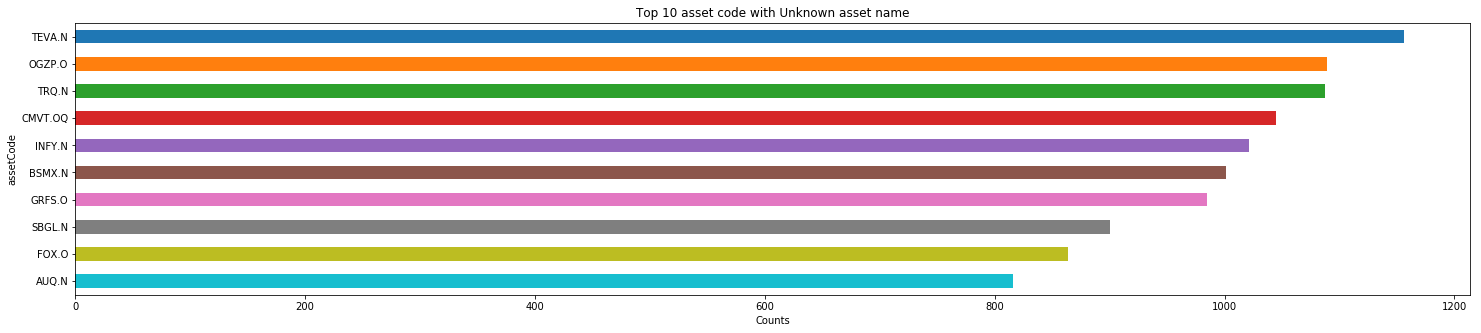

In [100]:
unknown_assetname =market_data[market_data['assetName']=='Unknown']
unknown_assetname['assetCode'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh',figsize=(25,5))
plt.ylabel('assetCode')
plt.xlabel('Counts')
plt.title('Top 10 asset code with Unknown asset name')
plt.gca().invert_yaxis()

Describe each asset for particular year

In [79]:
desc_assets=market_data[market_data['time'].dt.year==2016].groupby('assetCode').describe()
desc_assets

Plot Asset code vs time

Text(0.5,1,'Number of asset codes versus time')

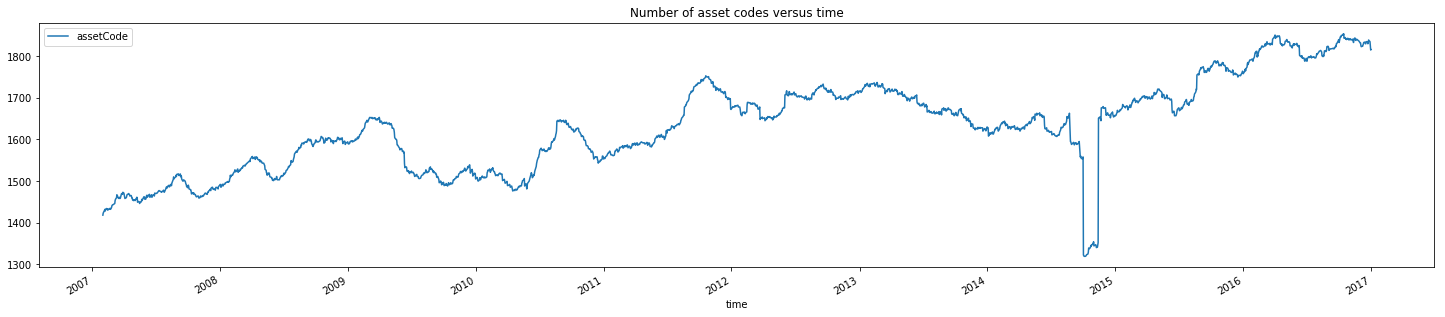

In [84]:
market_data.sort_values(by='time',ascending=True)[['time','assetCode']].groupby(['time']).count().plot(kind='line',figsize=(25,5))
plt.title('Number of asset codes versus time')

### 1.6 Stock Volume

In [42]:
market_data[market_data['assetCode']=='AAPL.O']

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
3,2007-02-01 22:00:00,AAPL.O,Apple Inc,23747329.0,84.7400,86.230,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0
1421,2007-02-02 22:00:00,AAPL.O,Apple Inc,22212416.0,84.7500,84.120,0.000118,-0.024469,-0.001091,-0.026983,-0.042373,-0.050779,NaN,NaN,-0.009770,1.0
2844,2007-02-05 22:00:00,AAPL.O,Apple Inc,20737742.0,83.9400,84.300,-0.009558,0.002140,-0.008843,0.001477,-0.032838,-0.054297,NaN,NaN,0.005037,1.0
4272,2007-02-06 22:00:00,AAPL.O,Apple Inc,30893975.0,84.1500,84.450,0.002502,0.001779,0.002006,0.002135,-0.018086,-0.014931,NaN,NaN,0.057268,1.0
5702,2007-02-07 22:00:00,AAPL.O,Apple Inc,38180972.0,86.1500,84.495,0.023767,0.000533,0.022779,0.000392,-0.006344,-0.025039,NaN,NaN,0.034650,1.0
7134,2007-02-08 22:00:00,AAPL.O,Apple Inc,24264750.0,86.1800,85.430,0.000348,0.011066,0.001591,0.010226,-0.000812,-0.019297,NaN,NaN,0.041006,1.0
8562,2007-02-09 22:00:00,AAPL.O,Apple Inc,30756328.0,83.2700,85.880,-0.033767,0.005267,-0.024615,0.006735,-0.024713,-0.013497,NaN,NaN,0.011036,1.0
9994,2007-02-12 22:00:00,AAPL.O,Apple Inc,25873256.0,84.8800,84.440,0.019335,-0.016768,0.023276,-0.009432,-0.012334,-0.021553,NaN,NaN,0.010912,1.0
11428,2007-02-13 22:00:00,AAPL.O,Apple Inc,21250545.0,84.6300,85.160,-0.002945,0.008527,-0.012278,0.012093,-0.010754,-0.014694,NaN,NaN,-0.001262,1.0
12860,2007-02-14 22:00:00,AAPL.O,Apple Inc,18150679.0,85.3000,84.630,0.007917,-0.006224,-0.001869,-0.012470,-0.005016,-0.002534,NaN,NaN,-0.002896,1.0


We can see that market is closed on Saturday and Sunday and also on official holidays

Let's also check stock volume trend

In [43]:
def volume_trend(assetCode):
    market_data[market_data['assetCode']==assetCode].sort_values(by='time',ascending=True)[['time','assetCode','volume']].groupby(['time','assetCode']).sum().plot(kind='line',figsize=(25,5))

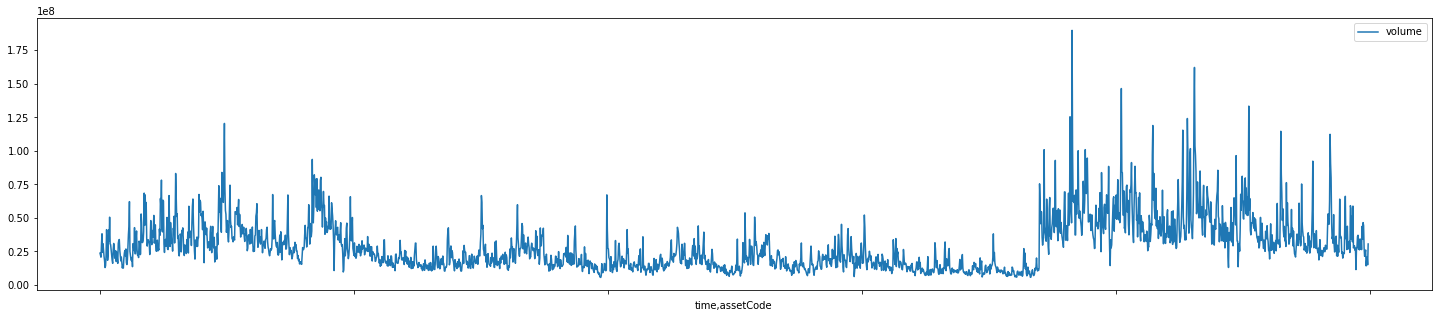

In [44]:
volume_trend('AAPL.O')

Looking at the plot above, we see that Apple Volumes have increased in recent years.

Let's identify top 10 volumes on latest date

In [66]:
top_10_byvolume=market_data[(market_data['time'].dt.year==2016)&(market_data['time'].dt.day==30)&(market_data['time'].dt.month==12)].sort_values(by='volume',ascending=False)[['assetCode','volume']].head(10)

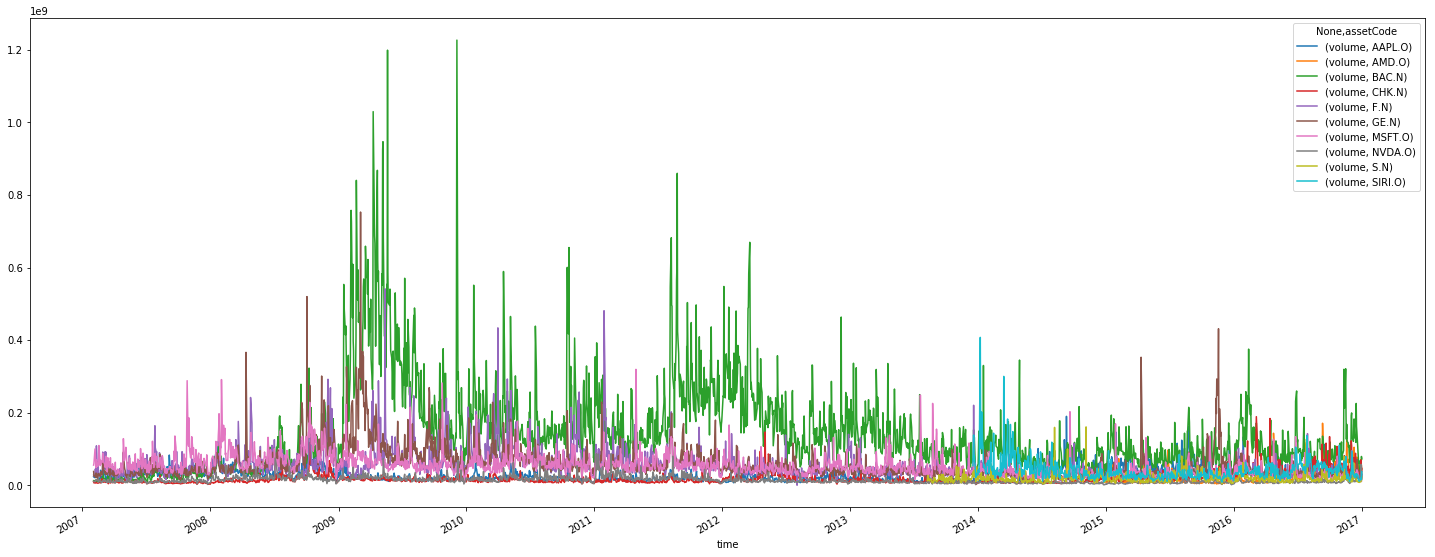

In [52]:
import matplotlib.pyplot as plt

market_data[market_data['assetCode'].isin(list(top_10_byvolume['assetCode']))].sort_values(by='time',ascending=True)[['time','assetCode','volume']].groupby(['time','assetCode']).sum().unstack().plot(figsize=(25,10))

Bank of America is at top but recently during last 4 to 5 years, volume has decreased

Some of the stocks have data for few years

In [47]:
market_data[market_data['assetCode']=='AMD.O']['time'].dt.year.unique()

array([2015, 2016], dtype=int64)

Lets group stocks monthly and then check

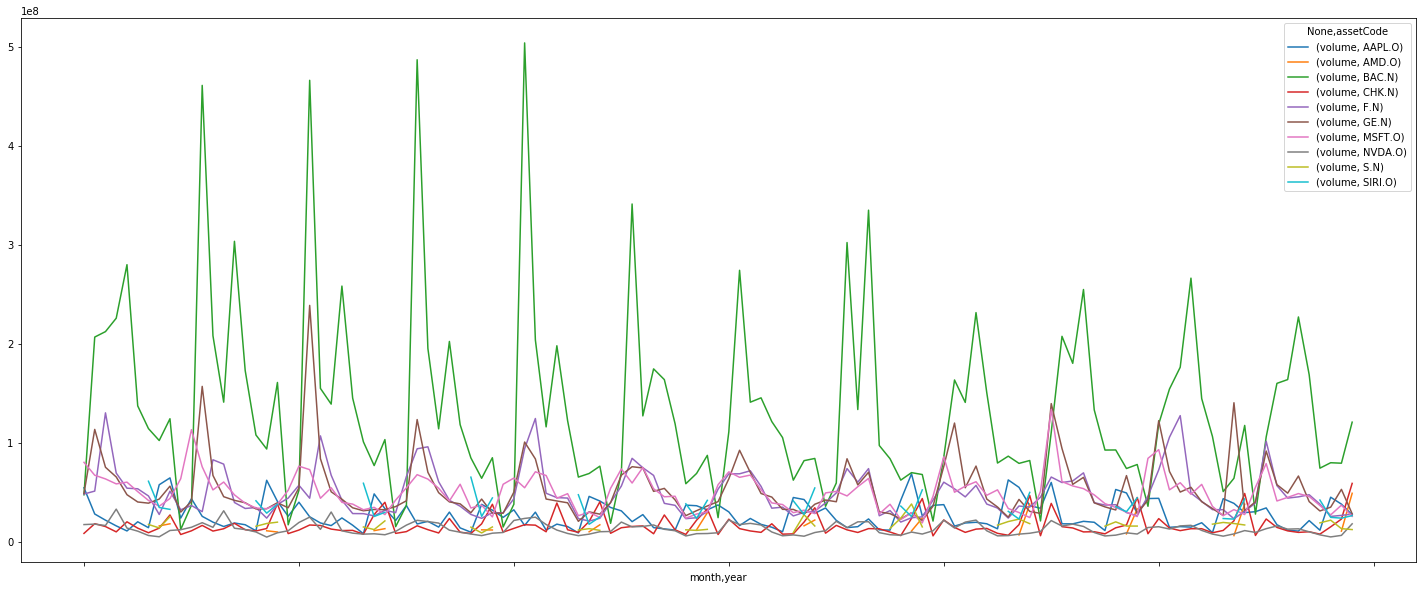

In [65]:
asset_data = market_data[market_data['assetCode'].isin(list(top_10_byvolume['assetCode']))].sort_values(by='time',ascending=True)[['time','assetCode','volume']]
asset_data['month'] = asset_data['time'].dt.month
asset_data['year'] = asset_data['time'].dt.year
asset_data.groupby(['month','year','assetCode']).median().unstack().plot(figsize=(25,10),kind='line')

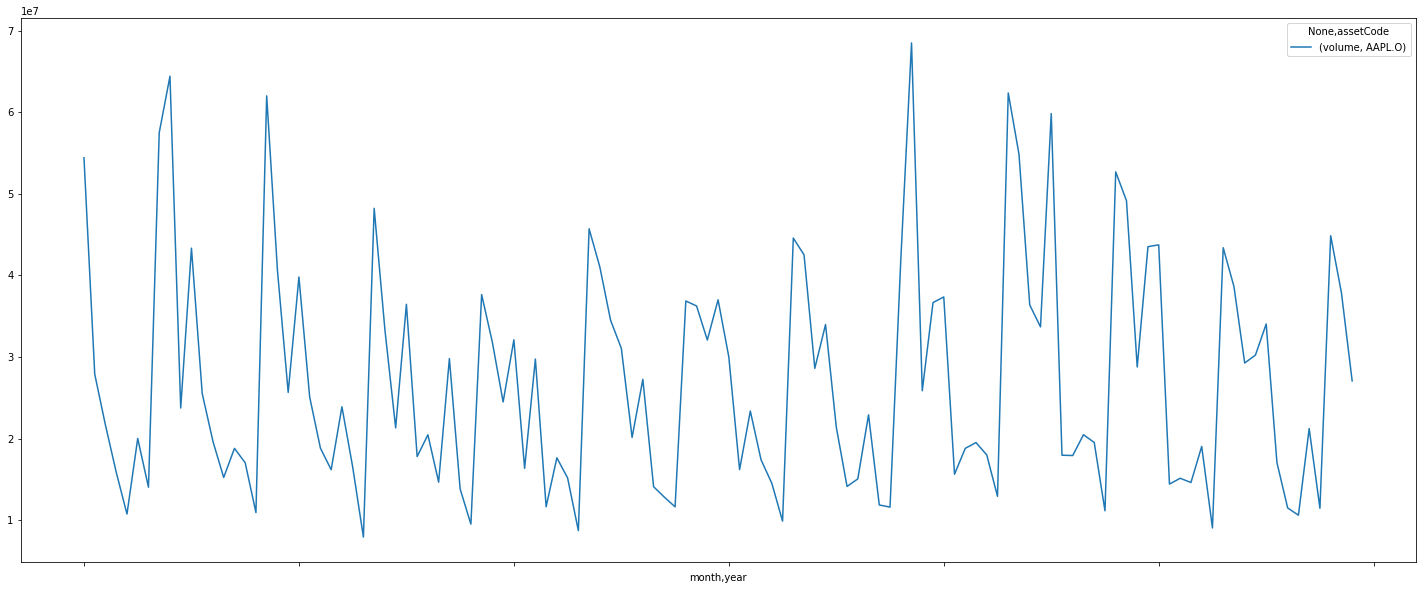

In [68]:
asset_data = market_data[market_data['assetCode']=='AAPL.O'].sort_values(by='time',ascending=True)[['time','assetCode','volume']]
asset_data['month'] = asset_data['time'].dt.month
asset_data['year'] = asset_data['time'].dt.year
asset_data.groupby(['month','year','assetCode']).median().unstack().plot(figsize=(25,10),kind='line')

We can see pattern here. It strongly suggests for time-series analysis.

In [69]:
market_data['volume'].describe()

count    4.072955e+06
mean     2.665312e+06
std      7.687607e+06
min      0.000000e+00
25%      4.657965e+05
50%      9.821000e+05
75%      2.403166e+06
max      1.226791e+09
Name: volume, dtype: float64

### 1.7 Stock Closing & Opening Prices

In [70]:
market_data['close'].describe()

count    4.072955e+06
mean     3.971241e+01
std      4.228822e+01
min      7.000000e-02
25%      1.725000e+01
50%      3.030000e+01
75%      4.986000e+01
max      1.578130e+03
Name: close, dtype: float64

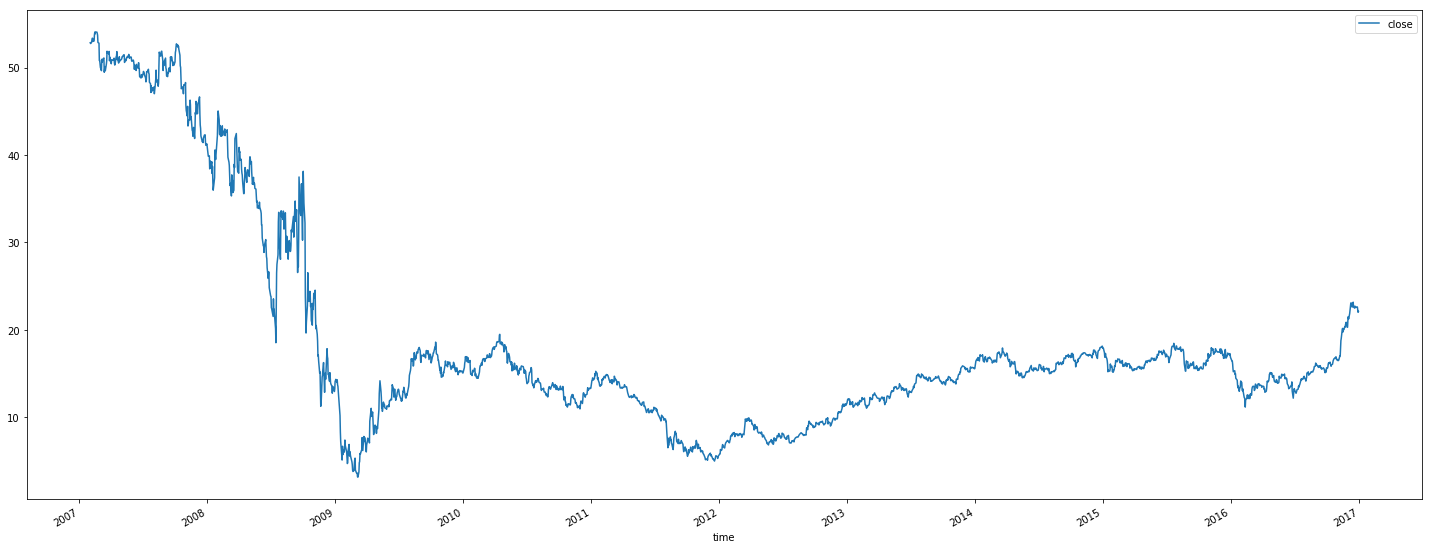

In [73]:
market_data[market_data['assetCode']=='BAC.N'].sort_values(by='time',ascending=True)[['time','close']].groupby('time').median().plot(figsize=(25,10),kind='line')

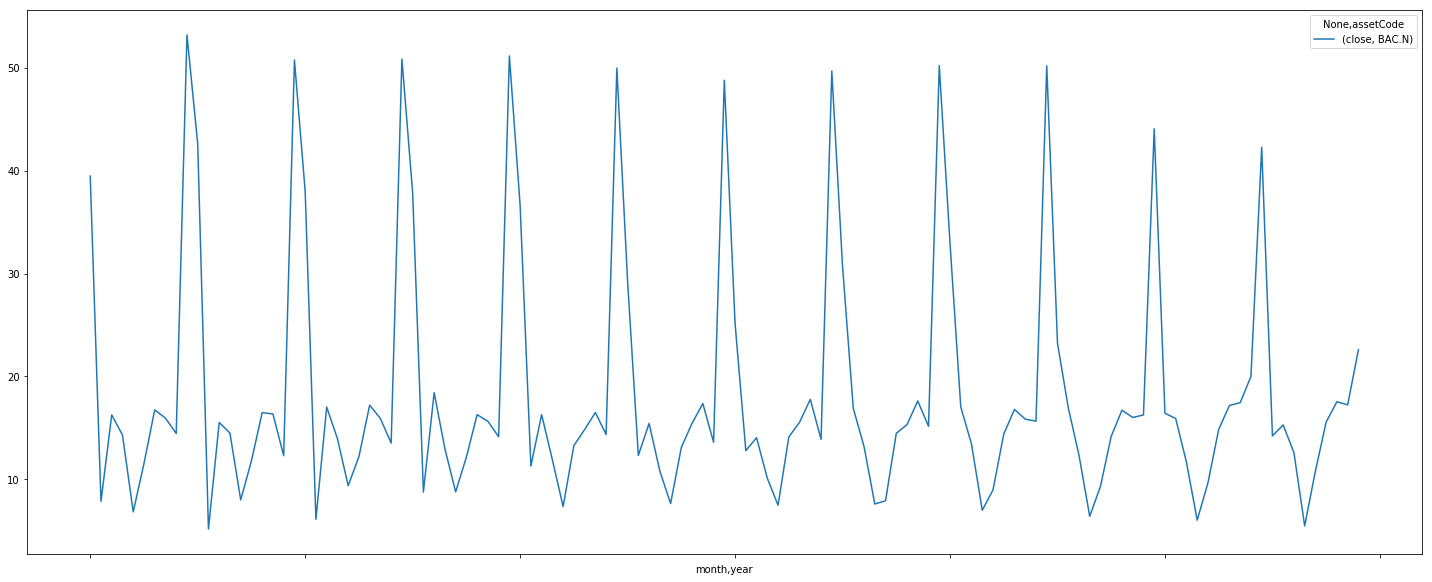

In [74]:
asset_data = market_data[market_data['assetCode']=='BAC.N'].sort_values(by='time',ascending=True)[['time','assetCode','close']]
asset_data['month'] = asset_data['time'].dt.month
asset_data['year'] = asset_data['time'].dt.year
asset_data.groupby(['month','year','assetCode']).median().unstack().plot(figsize=(25,10),kind='line')

Time series analysis can be easily performed here.

Also, we can look at market close price by quantiles.

Lets pick random assets and plot closing price

In [75]:
import random
num_to_select = 5                          # set the number to select here.
list_of_random_assets = random.sample(list(set(market_data['assetCode'])), num_to_select)
list_of_random_assets 

['AAL.O', 'MVG.A', 'CIM.N', 'DLR.N', 'SKM.N']

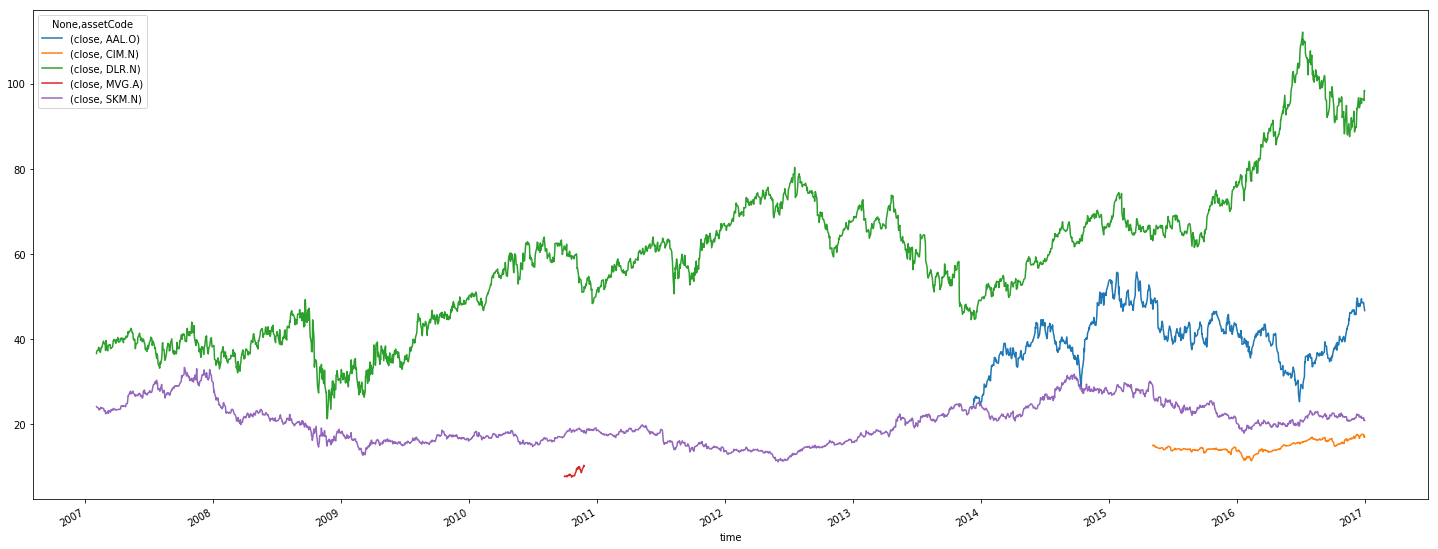

In [76]:
market_data[market_data['assetCode'].isin(list(list_of_random_assets))].sort_values(by='time',ascending=True)[['time','assetCode','close']].groupby(['time','assetCode']).median().unstack().plot(figsize=(25,10))

This is random plot every time you make. From this random plot we see that there are some companies who only traded for few years. May be it was then acquired by some other company. Here I see one of the company SGI.O which we see was acquired by some other company.

Stocks of some of the company went up while stocks of some of the company went down may be due to bankruptcy.

Some are stable.

Lets see assetCode='MVG.A'

You may see other asset codes

In [78]:
list(set(market_data[market_data['assetCode']=='MVG.A']['time'].dt.year))

[2010]

We can see that this company only traded in 2010. So there are companies which traded for few years and closed may be due to acquisition, bankruptcy etc

Let's look at closing and opening price of any stock

In [80]:
market_data[market_data['assetCode']=='BAC.N'][['time','assetCode','volume','close','open']].head()

,time,assetCode,volume,close,open
143,2007-02-01 22:00:00,BAC.N,12647800.0,52.84,52.76
1561,2007-02-02 22:00:00,BAC.N,12651800.0,52.74,52.83
2984,2007-02-05 22:00:00,BAC.N,11112400.0,52.88,52.74
4413,2007-02-06 22:00:00,BAC.N,13702200.0,53.21,52.77
5844,2007-02-07 22:00:00,BAC.N,9509600.0,53.36,53.35


Closing of one day is not same as next day opening. Here news data can help us.

### 1.8 Correlations

Text(0.5,1,'Pair-wise correlation')

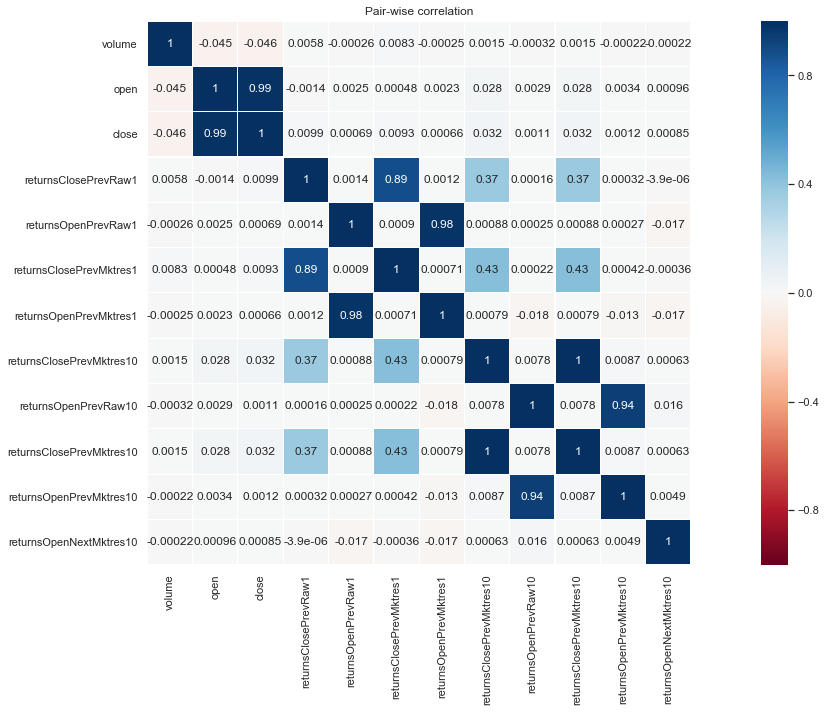

In [9]:
columns_corr_market = ['volume', 'open', 'close','returnsClosePrevRaw1','returnsOpenPrevRaw1',\
           'returnsClosePrevMktres1','returnsOpenPrevMktres1','returnsClosePrevMktres10','returnsOpenPrevRaw10',\
           'returnsClosePrevMktres10', 'returnsOpenPrevMktres10', 'returnsOpenNextMktres10']
colormap = plt.cm.RdBu
plt.figure(figsize=(25,10))
sns.heatmap(market_data[columns_corr_market].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Pair-wise correlation')

## 2. News Data

The news data contains information at both the news article level and asset level (in other words, the table is intentionally not normalized)

- time(datetime64[ns, UTC]) - UTC timestamp showing when the data was available on the feed (second precision)
- sourceTimestamp(datetime64[ns, UTC]) - UTC timestamp of this news item when it was created
- firstCreated(datetime64[ns, UTC]) - UTC timestamp for the first version of the item
- sourceId(object) - an Id for each news item
- headline(object) - the item's headline
- urgency(int8) - differentiates story types (1: alert, 3: article)
- takeSequence(int16) - the take sequence number of the news item, starting at 1. For a given story, alerts and articles have separate sequences.
- provider(category) - identifier for the organization which provided the news item (e.g. RTRS for Reuters News, BSW for Business Wire)
- subjects(category) - topic codes and company identifiers that relate to this news item. Topic codes describe the news item's subject matter. These can cover asset classes, geographies, events, industries/sectors, and other types.
- audiences(category) - identifies which desktop news product(s) the news item belongs to. They are typically tailored to specific audiences. (e.g. "M" for Money International News Service and "FB" for French General News Service)
- bodySize(int32) - the size of the current version of the story body in characters
- companyCount(int8) - the number of companies explicitly listed in the news item in the subjects field
- headlineTag(object) - the Thomson Reuters headline tag for the news item
- marketCommentary(bool) - boolean indicator that the item is discussing general market conditions, such as "After the Bell" summaries
- sentenceCount(int16) - the total number of sentences in the news item. Can be used in conjunction with firstMentionSentence to determine the relative position of the first mention in the item.
- wordCount(int32) - the total number of lexical tokens (words and punctuation) in the news item
- assetCodes(category) - list of assets mentioned in the item
- assetName(category) - name of the asset
- firstMentionSentence(int16) - the first sentence, starting with the headline, in which the scored asset is mentioned.
    - 1: headline
    - 2: first sentence of the story body
    - 3: second sentence of the body, etc
    - 0: the asset being scored was not found in the news item's headline or body text. As a result, the entire news item's text (headline + body) will be used to determine the sentiment score.
- relevance(float32) - a decimal number indicating the relevance of the news item to the asset. It ranges from 0 to 1. If the asset is mentioned in the headline, the relevance is set to 1. When the item is an alert (urgency == 1), relevance should be gauged by firstMentionSentence instead.
- sentimentClass(int8) - indicates the predominant sentiment class for this news item with respect to the asset. The indicated class is the one with the highest probability.
- sentimentNegative(float32) - probability that the sentiment of the news item was negative for the asset
- sentimentNeutral(float32) - probability that the sentiment of the news item was neutral for the asset
- sentimentPositive(float32) - probability that the sentiment of the news item was positive for the asset
- sentimentWordCount(int32) - the number of lexical tokens in the sections of the item text that are deemed relevant to the asset. This can be used in conjunction with wordCount to determine the proportion of the news item discussing the asset.
- noveltyCount12H(int16) - The 12 hour novelty of the content within a news item on a particular asset. It is calculated by comparing it with the asset-specific text over a cache of previous news items that contain the asset.
- noveltyCount24H(int16) - same as above, but for 24 hours
- noveltyCount3D(int16) - same as above, but for 3 days
- noveltyCount5D(int16) - same as above, but for 5 days
- noveltyCount7D(int16) - same as above, but for 7 days
- volumeCounts12H(int16) - the 12 hour volume of news for each asset. A cache of previous news items is maintained and the number of news items that mention the asset within each of five historical periods is calculated.
- volumeCounts24H(int16) - same as above, but for 24 hours
- volumeCounts3D(int16) - same as above, but for 3 days
- volumeCounts5D(int16) - same as above, but for 5 days
- volumeCounts7D(int16) - same as above, but for 7 daysews_data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])

In [92]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [1]:
df1 = pd.read_csv("news_train1.csv")

In [2]:
df2 = pd.read_csv("news_train2.csv")

In [3]:
df3 = pd.read_csv("news_train3.csv")

In [4]:
df4 = pd.read_csv("news_train4.csv")

In [5]:
df5 = pd.read_csv("news_train5.csv")

In [6]:
df6 = pd.read_csv("news_train6.csv")

In [7]:
df7 = pd.read_csv("news_train7.csv")

In [8]:
df8 = pd.read_csv("news_train8.csv")

In [9]:
df9 = pd.read_csv("news_train9.csv")

In [10]:
df10 = pd.read_csv("news_train10.csv")

In [7]:
news_data2 = pd.concat([df6,df7,df8,df9,df10])

In [6]:
news_data1 = pd.concat([df1,df2,df3,df4,df5])

In [11]:
news_data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

### 2.1 Data shapes and types

In [12]:
news_data.tail() #I observe last row of data is missing compared to Kaggle Kernel

,Unnamed: 0,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
328744,9328744,2016-12-30 21:55:46+00:00,2016-12-30 21:55:46+00:00,2016-12-30 21:55:46+00:00,e778ca45a1915cb9,DATARAM SHARES DOWN 13.6 PCT IN EXTENDED TRADING,1,1,RTRS,"{'STX', 'HOT', 'COMP', 'TMT', 'US', 'TECH', 'R...",...,0,0,1,1,1,0,0,1,1,1
328745,9328745,2016-12-30 21:56:06+00:00,2016-12-30 21:56:06+00:00,2016-12-30 21:56:06+00:00,fc80724160cc7bf4,"INTREXON - ON DEC 30, CO, THIRD SECURITY EXECU...",1,1,RTRS,"{'BLR', 'HECA', 'PHMR', 'MRCH', 'US', 'RTRS', ...",...,0,0,0,0,0,0,1,10,10,10
328746,9328746,2016-12-30 21:56:28+00:00,2016-12-30 21:56:28+00:00,2016-12-30 21:56:06+00:00,2e3e5407e186dd51,INTREXON CORP - AMENDMENT EXTENDS TERM OF SERV...,1,2,RTRS,"{'BLR', 'DBT', 'HECA', 'PHMR', 'MRCH', 'BACT',...",...,0,0,1,1,1,1,2,11,11,11
328747,9328747,2016-12-30 21:57:00+00:00,2016-12-30 21:57:00+00:00,2016-12-30 21:57:00+00:00,cef1bb88f92ca104,EQUITY ALERT: Rosen Law Firm Announces Investi...,3,1,BSW,"{'CMSS', 'CLJ', 'GEN', 'NEWR', 'HECA', 'PHMR',...",...,0,0,3,4,4,1,2,18,41,41
328748,9328748,2016-12-30 21:58:53+00:00,2016-12-30 21:58:53+00:00,2016-12-30 21:58:53+00:00,c26c3df1804571a6,PROFESSIONAL DIVERSITY NETWORK INC - FILES FOR...,1,1,RTRS,"{'BLR', 'SWIT', 'ITSE', 'SISU', 'BACT', 'TMT',...",...,0,0,0,0,0,0,0,3,3,3


In [13]:
news_data = news_data.drop(news_data.columns[0], axis=1)
list(news_data.columns.values)

['time',
 'sourceTimestamp',
 'firstCreated',
 'sourceId',
 'headline',
 'urgency',
 'takeSequence',
 'provider',
 'subjects',
 'audiences',
 'bodySize',
 'companyCount',
 'headlineTag',
 'marketCommentary',
 'sentenceCount',
 'wordCount',
 'assetCodes',
 'assetName',
 'firstMentionSentence',
 'relevance',
 'sentimentClass',
 'sentimentNegative',
 'sentimentNeutral',
 'sentimentPositive',
 'sentimentWordCount',
 'noveltyCount12H',
 'noveltyCount24H',
 'noveltyCount3D',
 'noveltyCount5D',
 'noveltyCount7D',
 'volumeCounts12H',
 'volumeCounts24H',
 'volumeCounts3D',
 'volumeCounts5D',
 'volumeCounts7D']

In [14]:
news_data.shape

(9328749, 35)

In [15]:
news_data['time'] = pd.to_datetime(news_data['time'])
news_data['sourceTimestamp'] = pd.to_datetime(news_data['sourceTimestamp'])
news_data['firstCreated'] = pd.to_datetime(news_data['firstCreated'])
news_data['provider'] = news_data['provider'].astype('category')
news_data['subjects'] = news_data['subjects'].astype('category')
news_data['audiences'] = news_data['audiences'].astype('category')
news_data['assetCodes'] = news_data['assetCodes'].astype('category')
news_data['assetName'] = news_data['assetName'].astype('category')

In [16]:
news_data.dtypes

time                    datetime64[ns]
sourceTimestamp         datetime64[ns]
firstCreated            datetime64[ns]
sourceId                        object
headline                        object
urgency                          int64
takeSequence                     int64
provider                      category
subjects                      category
audiences                     category
bodySize                         int64
companyCount                     int64
headlineTag                     object
marketCommentary                  bool
sentenceCount                    int64
wordCount                        int64
assetCodes                    category
assetName                     category
firstMentionSentence             int64
relevance                      float64
sentimentClass                   int64
sentimentNegative              float64
sentimentNeutral               float64
sentimentPositive              float64
sentimentWordCount               int64
noveltyCount12H          

### 2.2 Check for Missing Values

In [17]:
news_data.isna().sum()

time                          0
sourceTimestamp               0
firstCreated                  0
sourceId                      0
headline                  73960
urgency                       0
takeSequence                  0
provider                      0
subjects                      0
audiences                     0
bodySize                      0
companyCount                  0
headlineTag             6341992
marketCommentary              0
sentenceCount                 0
wordCount                     0
assetCodes                    0
assetName                     0
firstMentionSentence          0
relevance                     0
sentimentClass                0
sentimentNegative             0
sentimentNeutral              0
sentimentPositive             0
sentimentWordCount            0
noveltyCount12H               0
noveltyCount24H               0
noveltyCount3D                0
noveltyCount5D                0
noveltyCount7D                0
volumeCounts12H               0
volumeCo

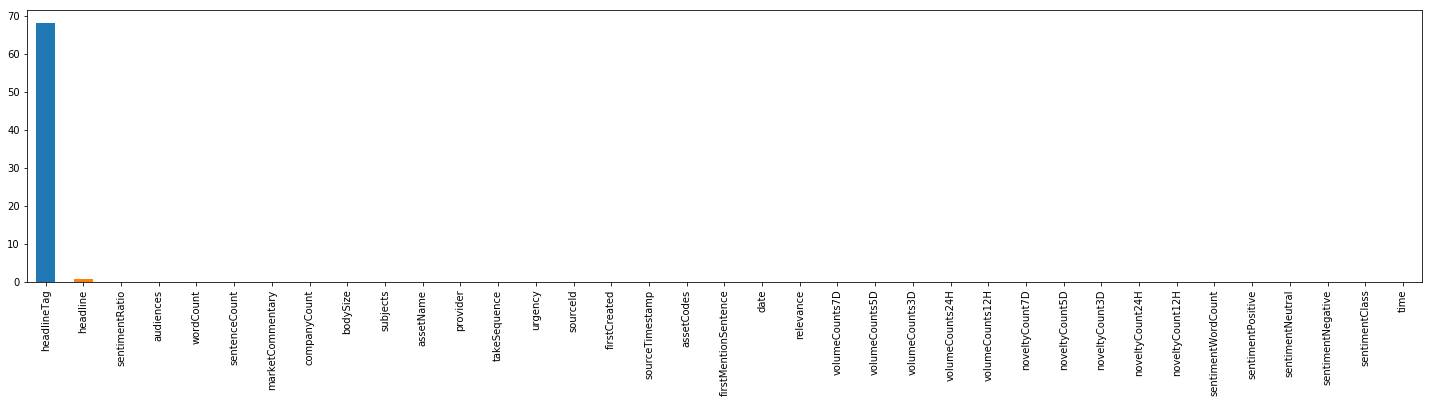

In [84]:
plt.figure(figsize=(25,5))
((news_data.isnull().sum()/news_data.shape[0])*100).sort_values(ascending=False).plot(kind='bar')

### 2.3 Check for Unique Values

In [20]:
news_data.nunique()

time                    5245342
sourceTimestamp         5228339
firstCreated            3441534
sourceId                6340205
headline                5532377
urgency                       3
takeSequence                 97
provider                     30
subjects                1733963
audiences                 88488
bodySize                  61200
companyCount                 43
headlineTag                 162
marketCommentary              2
sentenceCount               669
wordCount                 10365
assetCodes                10691
assetName                  8902
firstMentionSentence        516
relevance                 28412
sentimentClass                3
sentimentNegative       1321080
sentimentNeutral         582507
sentimentPositive       1025372
sentimentWordCount         6493
noveltyCount12H             501
noveltyCount24H             501
noveltyCount3D              501
noveltyCount5D              501
noveltyCount7D              501
volumeCounts12H            2565
volumeCo

### 2.4 Evolutions over Time

In [21]:
# Sort values by time then extract date
news_data = news_data.sort_values(by='time')
news_data['date'] = news_data['time'].dt.date

In [28]:
# Function to plot time series data
def plot_vs_time(data_frame, column, calculation='mean', span=10):
    if calculation == 'mean':
        group_temp = data_frame.groupby('date')[column].mean().reset_index()
    if calculation == 'count':
        group_temp = data_frame.groupby('date')[column].count().reset_index()
    if calculation == 'nunique':
        group_temp = data_frame.groupby('date')[column].nunique().reset_index()
    group_temp = group_temp.ewm(span=span).mean()
    fig = plt.figure(figsize=(25,5))
    plt.plot(group_temp['date'], group_temp[column])
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title('%s versus time' %column)

Text(0,0.5,'Count')

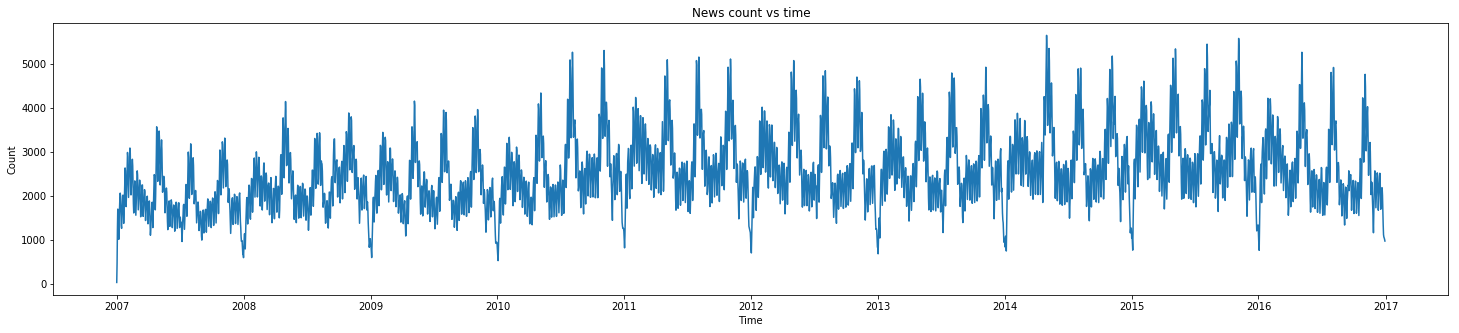

In [29]:
plot_vs_time(news_data, 'sourceId', calculation='count', span=10)
plt.title('News count vs time')
plt.ylabel('Count')

There is a maximum peak every quarter (time for quaterly financial report) and a minimum peak at the end of the year (time for Christmast holliday.)

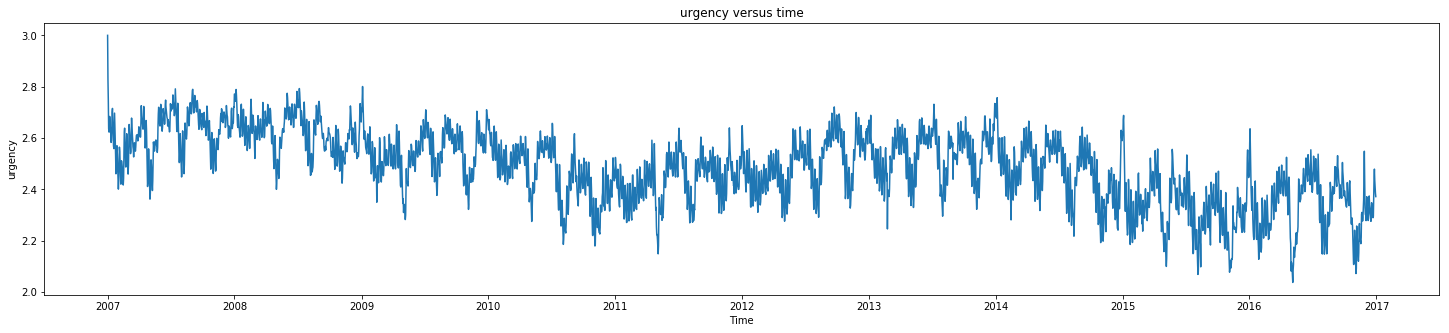

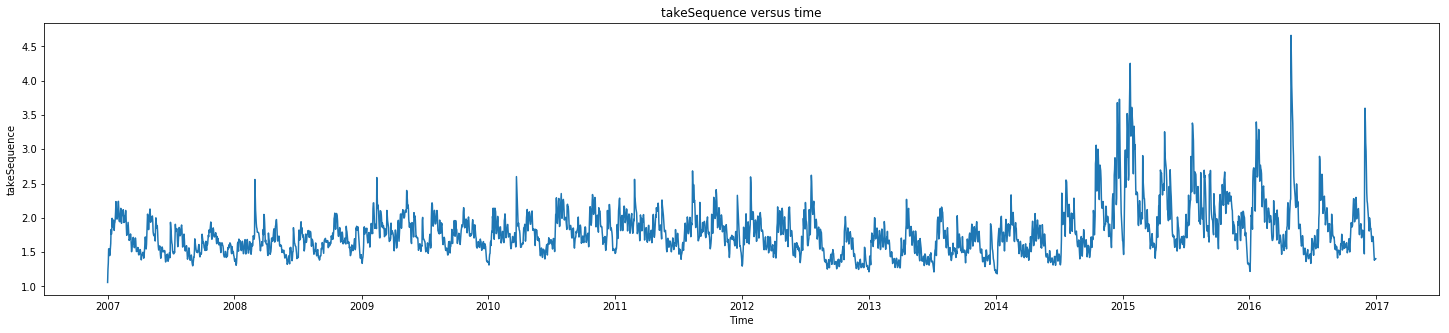

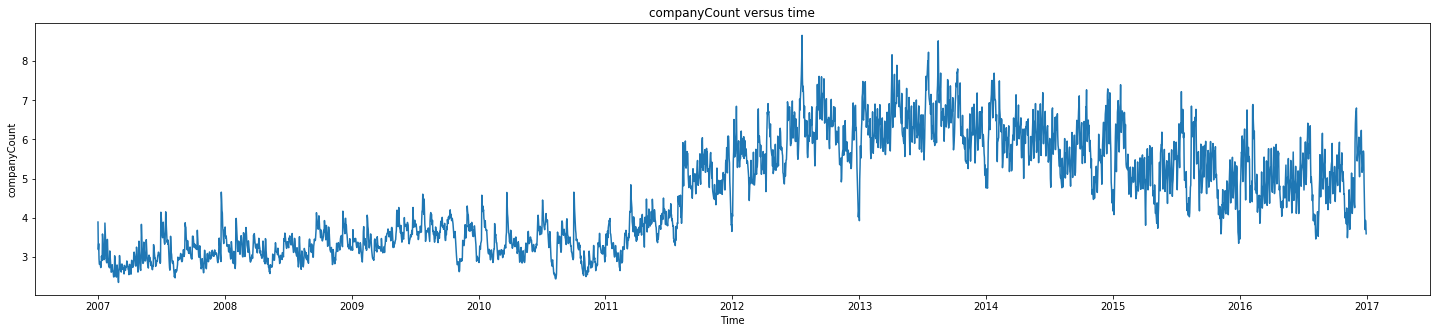

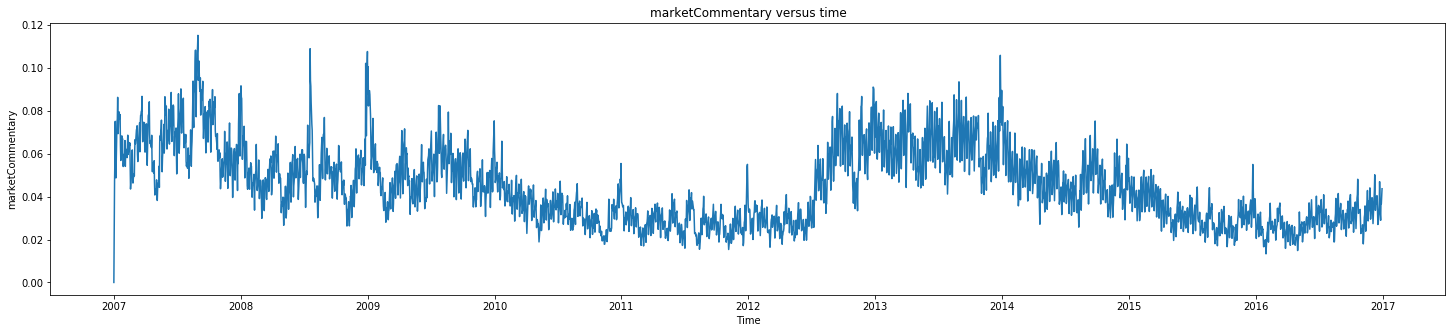

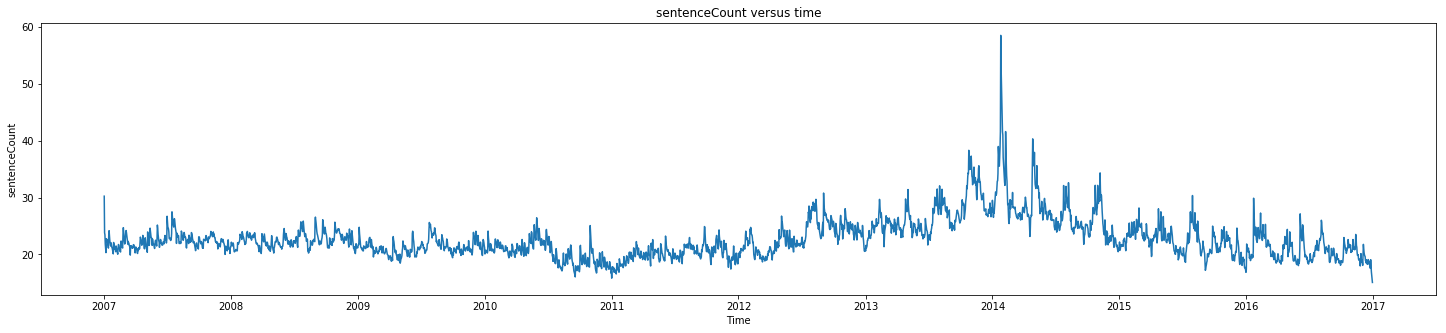

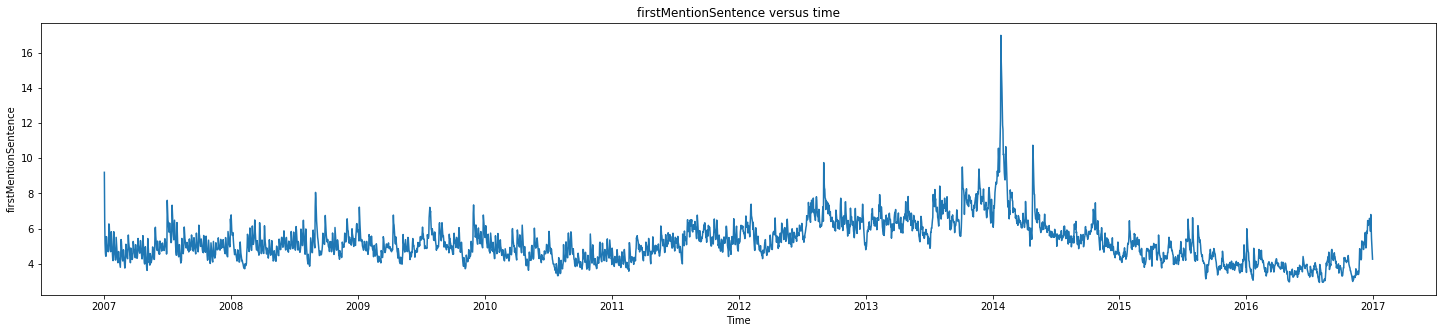

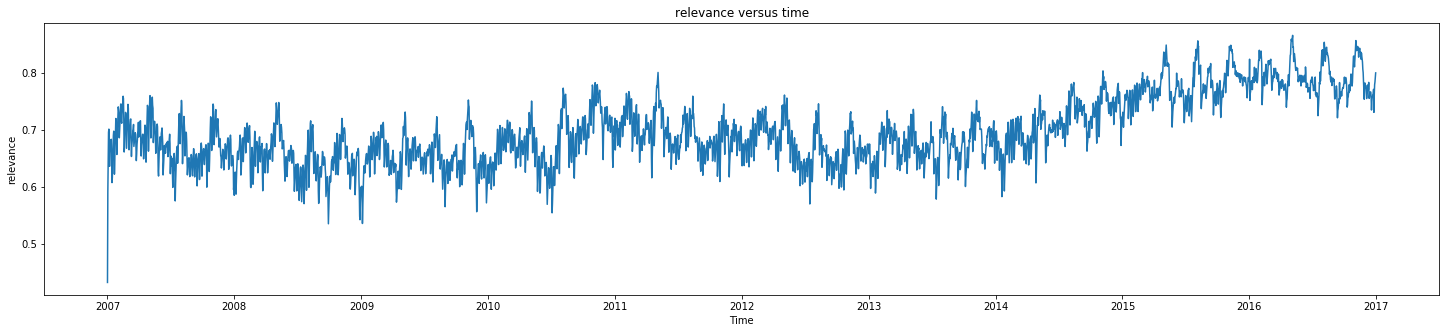

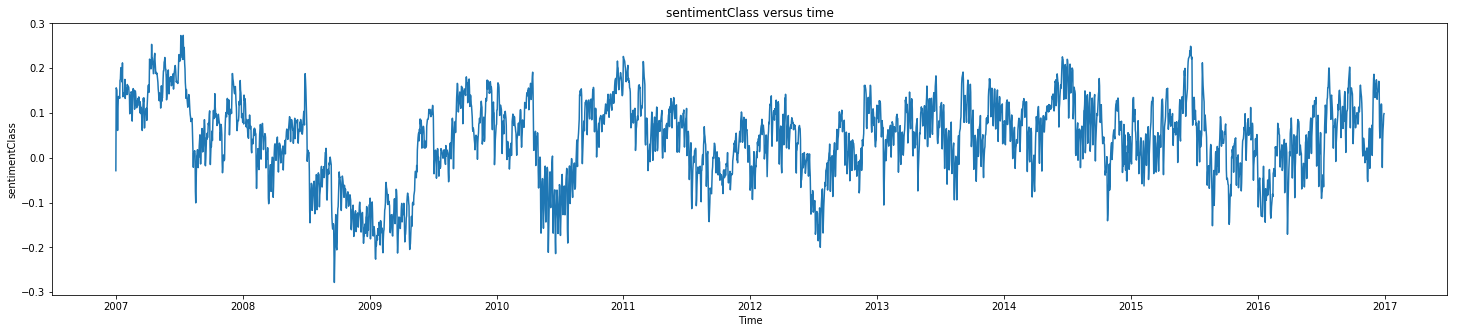

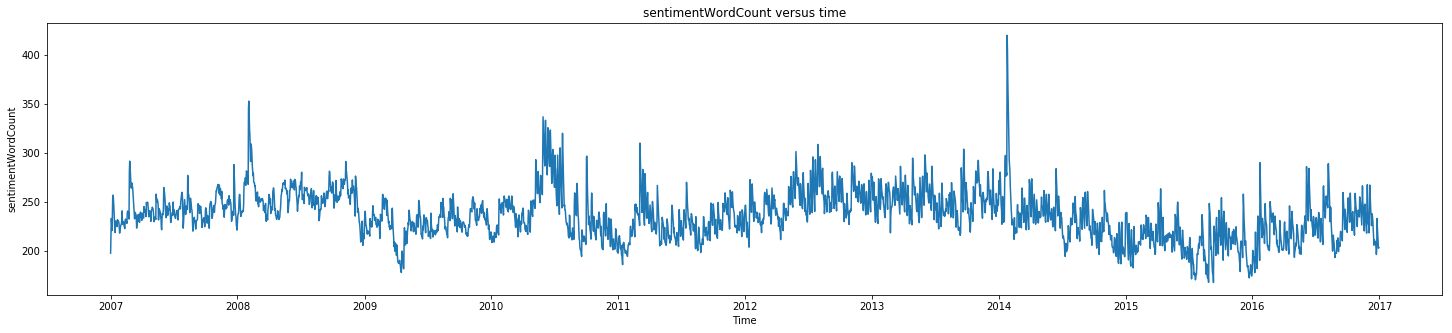

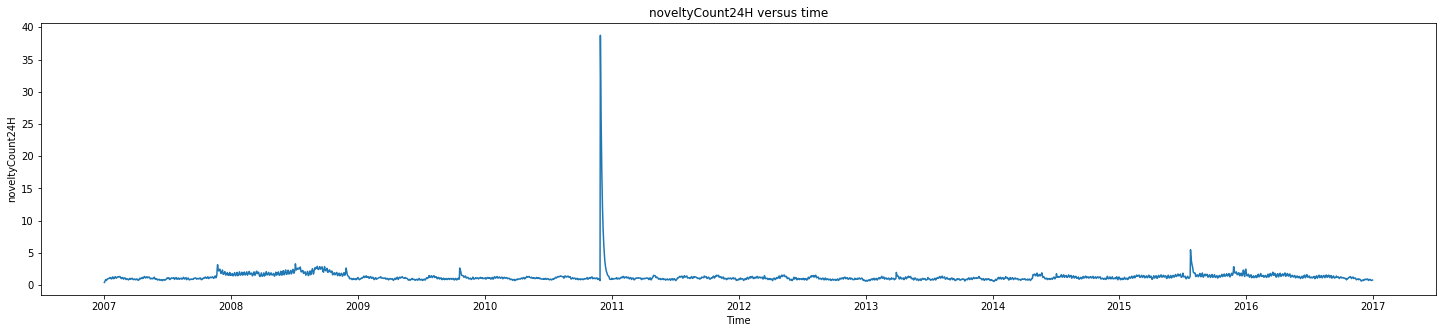

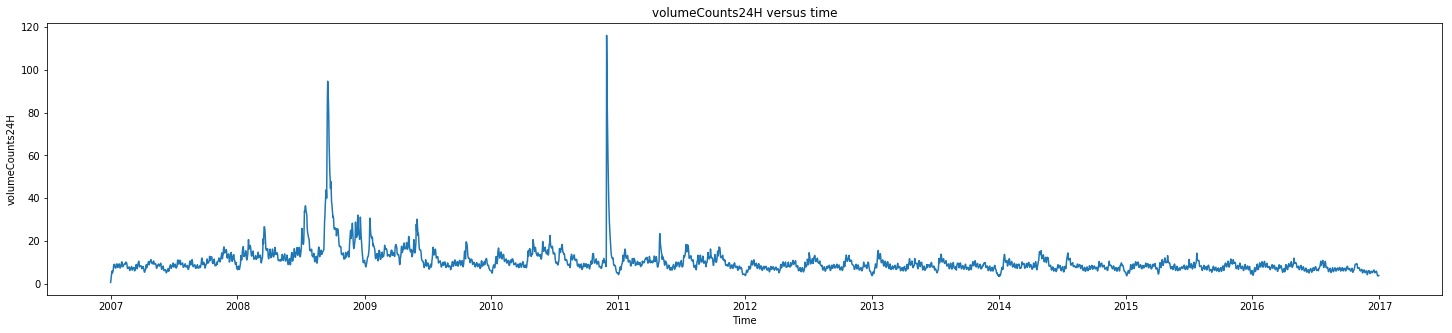

In [31]:
# Plot time evolution of several parameters

columns = ['urgency', 'takeSequence', 'companyCount','marketCommentary','sentenceCount',\
           'firstMentionSentence','relevance','sentimentClass','sentimentWordCount','noveltyCount24H', 'volumeCounts24H']

for column in columns:
    plot_vs_time(news_data, column)

### 2.5 Time Delay

In [34]:
time_delay = (pd.to_datetime(news_data['time']) - pd.to_datetime(news_data['firstCreated']))
time_delay_log10 = np.log10(time_delay.dt.total_seconds()/60+1)

Text(0.5,1,'Delay time distribution')

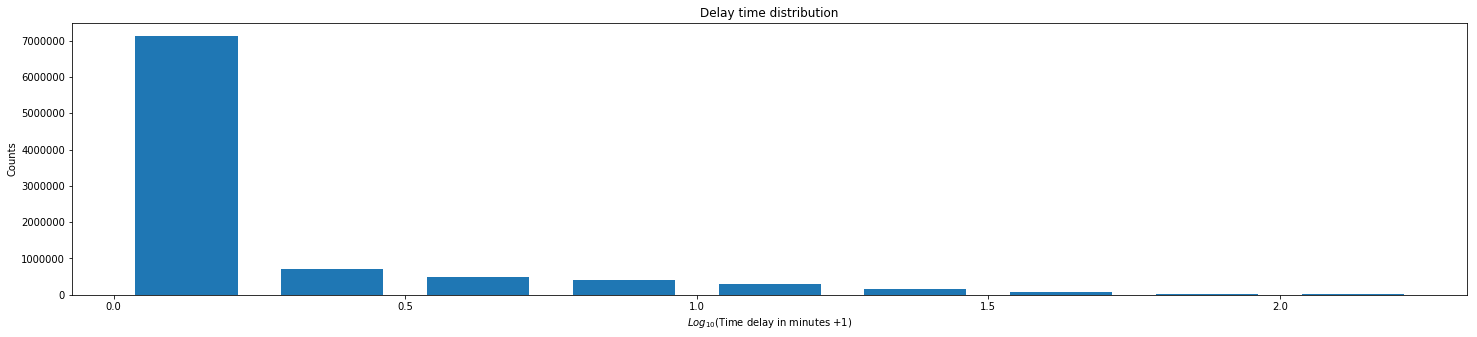

In [82]:
plt.figure(figsize=(25,5))
plt.hist(time_delay_log10, bins=np.arange(0,2.5,0.25), rwidth=0.7)
plt.xlabel('$Log_{10}$(Time delay in minutes +1)')
plt.ylabel('Counts')
plt.title('Delay time distribution')

Text(0,0.5,'Delay (minutes)')

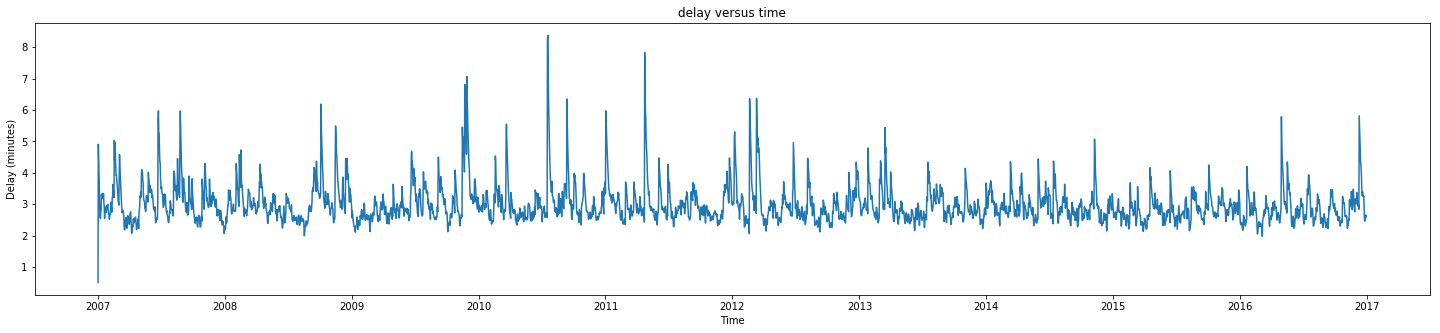

In [37]:
time_delay_min = time_delay.dt.total_seconds()/60
time_delay_df = time_delay_min.to_frame().join(news_data['date'].to_frame())
time_delay_df.columns = ['delay','date']
plot_vs_time(time_delay_df, 'delay')
plt.ylabel('Delay (minutes)')

### 2.6 Urgency Ratio

In [39]:
urgency_count = news_data.groupby('urgency')['sourceId'].count()
urgency_count = urgency_count/urgency_count.sum()
print('Urgency ratio')
urgency_count.sort_values(ascending=True)

Urgency ratio


urgency
2    0.000003
1    0.339398
3    0.660599
Name: sourceId, dtype: float64

Text(0.5,1,'Number of asset codes versus time')

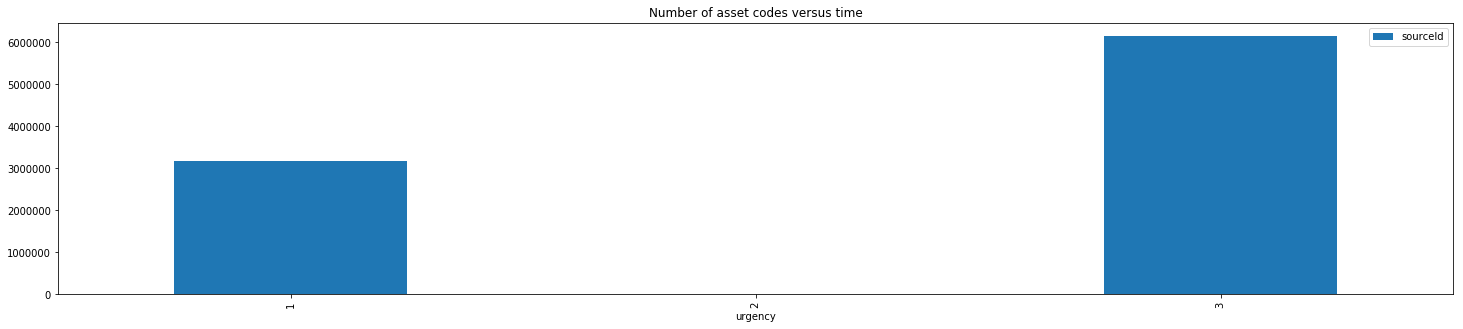

In [42]:
news_data[['sourceId','urgency']].groupby(['urgency']).count().plot(kind='bar',figsize=(25,5))
plt.title('Number of asset codes versus time')

### 2.7 Take Sequence

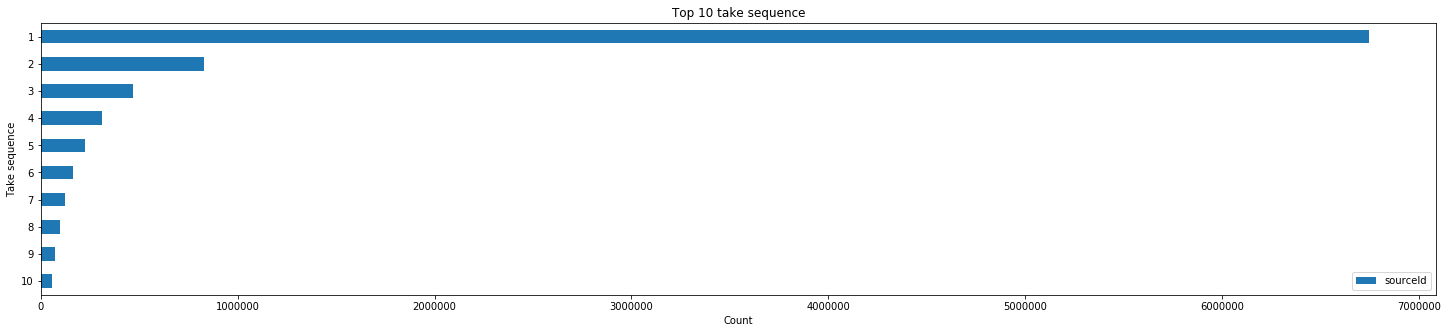

In [52]:
news_data[['sourceId','takeSequence']].groupby(['takeSequence']).count()[:10].plot(kind='barh',figsize=(25,5))
plt.xlabel('Count')
plt.ylabel('Take sequence')
plt.title('Top 10 take sequence')
plt.gca().invert_yaxis()


### 2.8 Provider

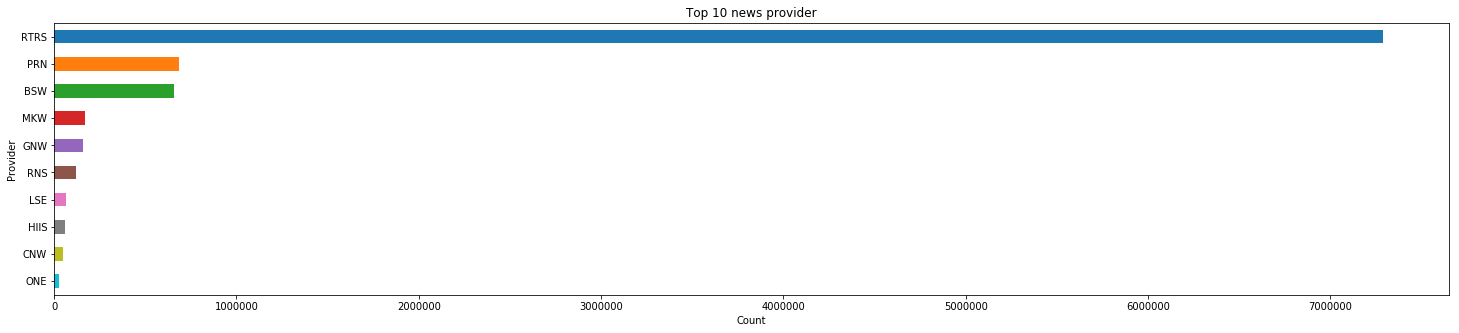

In [57]:
provider_count = news_data.groupby('provider')['sourceId'].count()
provider_sort = provider_count.sort_values(ascending= False)
plt.figure(figsize=(25,5))
provider_sort[:10].plot.barh()
plt.xlabel('Count')
plt.ylabel('Provider')
plt.title('Top 10 news provider')
plt.gca().invert_yaxis()
del provider_count

### 2.9 Subjects

In [58]:
# Extract data from a single cell
def contents_to_list(contents):
    text = contents[1:-1]
    text = re.sub(r",",' ',text)
    text = re.sub(r"'","", text)
    text_list = text.split('  ')
    return text_list

# Put data from columns into dict
def get_content_dict(content_column):
    content_dict = {}
    for i in range(len(content_column)):
        this_cell = content_column[i]
        content_list = contents_to_list(this_cell)        
        for content in content_list:
            if content in content_dict.keys():
                content_dict[content] += 1
            else:
                content_dict[content] = 1
    return content_dict

In [61]:
subjects = news_data.sample(n=10000, random_state=1)['subjects']
subjects_dict = get_content_dict(subjects)

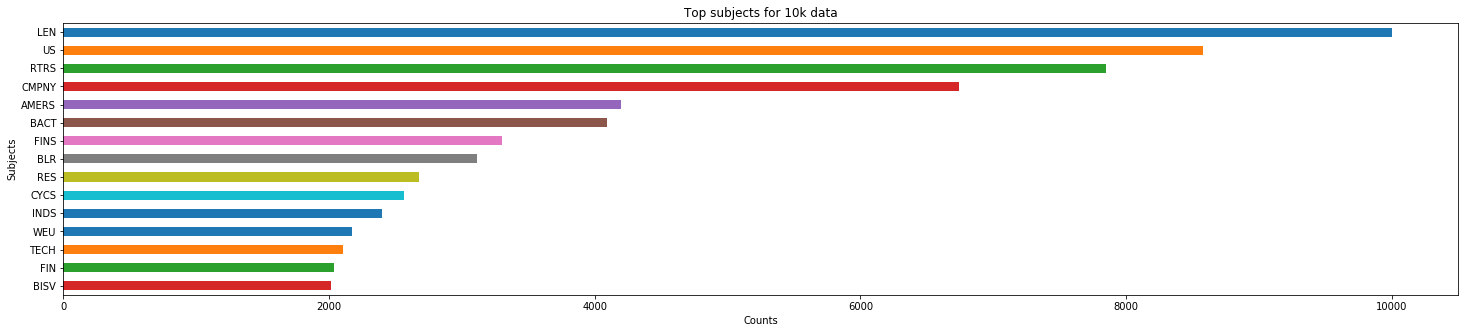

In [62]:
subjects_df = pd.Series(subjects_dict).sort_values(ascending=False)
plt.figure(figsize=(25,5))
subjects_df[:15].plot.barh()
plt.ylabel('Subjects')
plt.xlabel('Counts')
plt.title('Top subjects for 10k data')
plt.gca().invert_yaxis()
del subjects_df

### 2.10 Audiences

In [64]:
audiences = news_data.sample(n=10000, random_state=1)['audiences']
audiences_dict = get_content_dict(audiences)

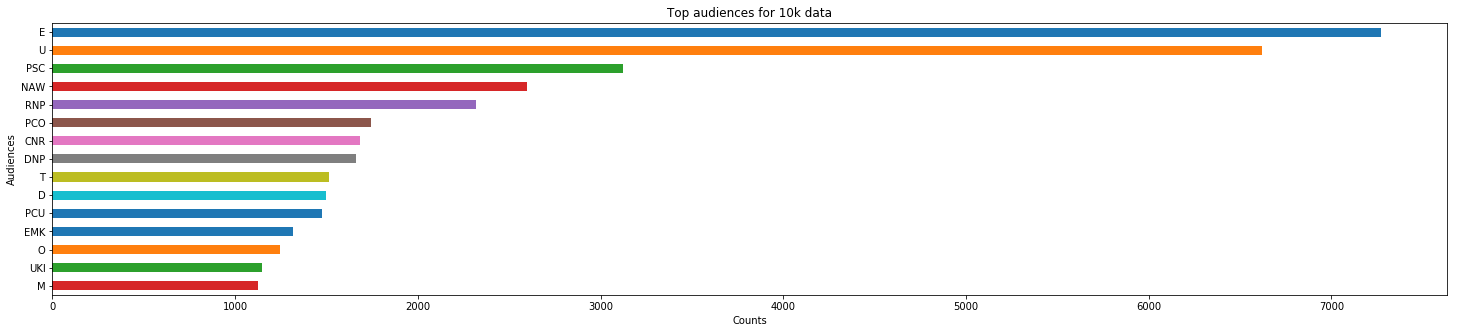

In [65]:
audiences_df = pd.Series(audiences_dict).sort_values(ascending=False)
plt.figure(figsize=(25,5))
audiences_df[:15].plot.barh()
plt.ylabel('Audiences')
plt.xlabel('Counts')
plt.title('Top audiences for 10k data')
plt.gca().invert_yaxis()

### 2.11 Company Count

Text(0.5,1,'Company count distribution')

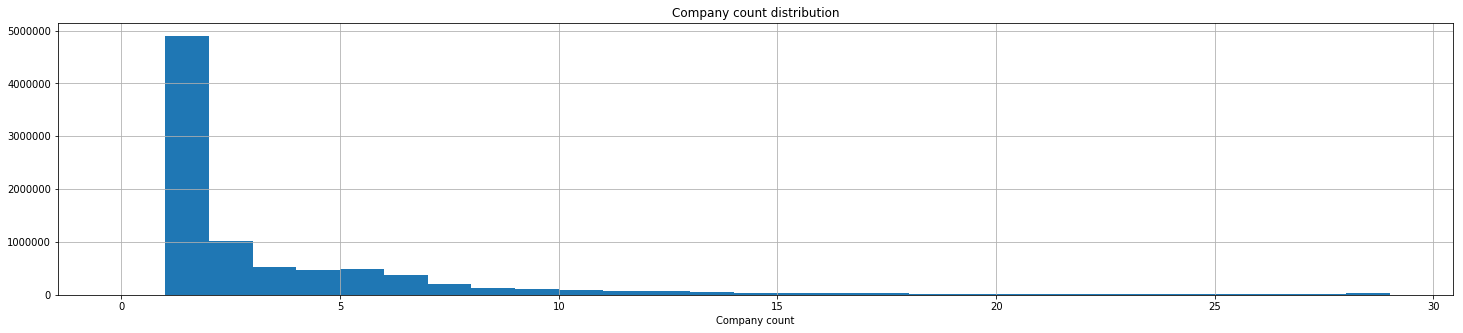

In [81]:
plt.figure(figsize=(25,5))
news_data['companyCount'].hist(bins=np.arange(0,30,1))
plt.xlabel('Company count')
plt.title('Company count distribution')

### 2.11 Headline Tag

In [67]:
head_line = news_data.groupby('headlineTag')['sourceId'].count()

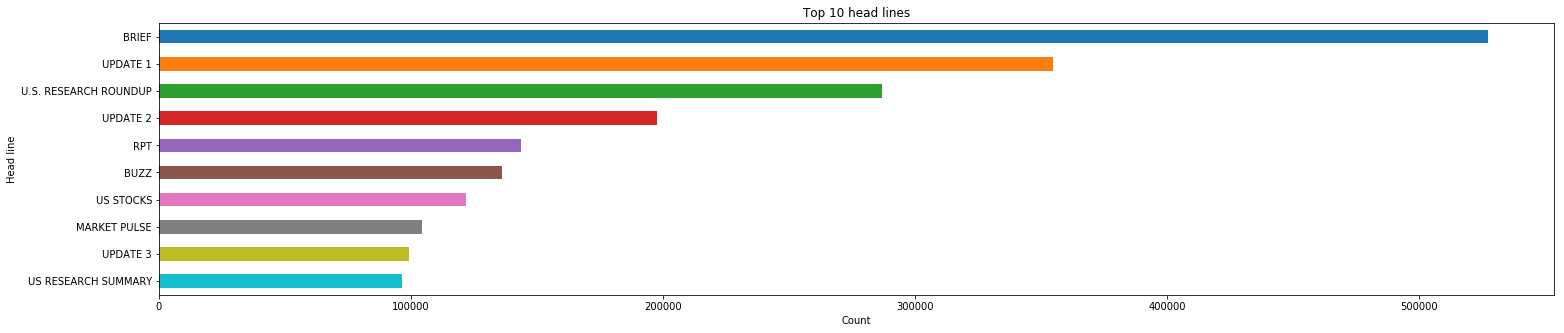

In [68]:
head_line_sort = head_line.sort_values(ascending= False)
plt.figure(figsize=(25,5))
head_line_sort[:10].plot.barh()
plt.xlabel('Count')
plt.ylabel('Head line')
plt.title('Top 10 head lines')
plt.gca().invert_yaxis()
del head_line

### 2.12 First sentence - Urgency - relevance - sentiment Word Count

Text(0.5,1,'First mention sentence distribution')

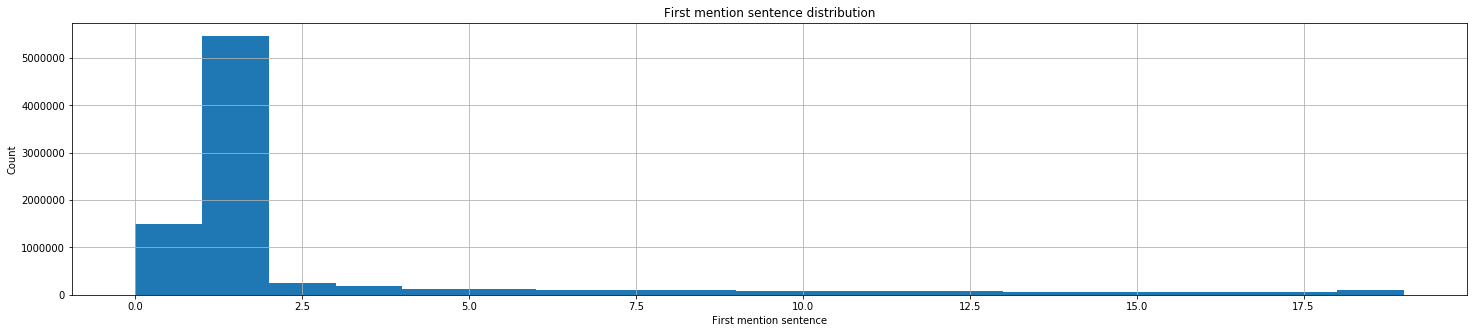

In [80]:
plt.figure(figsize=(25,5))
news_data['firstMentionSentence'].hist(bins=np.arange(0,20,1))
plt.xlabel('First mention sentence')
plt.ylabel('Count')
plt.title('First mention sentence distribution')

Text(0.5,1,'Relevance distribution')

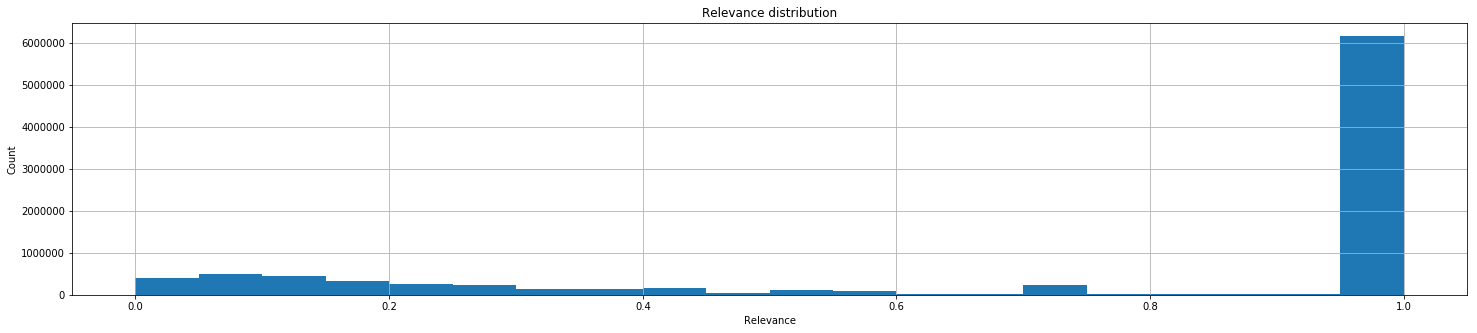

In [79]:
plt.figure(figsize=(25,5))
news_data['relevance'].hist(bins=np.arange(0,1.01,0.05))
plt.xlabel('Relevance')
plt.ylabel('Count')
plt.title('Relevance distribution')

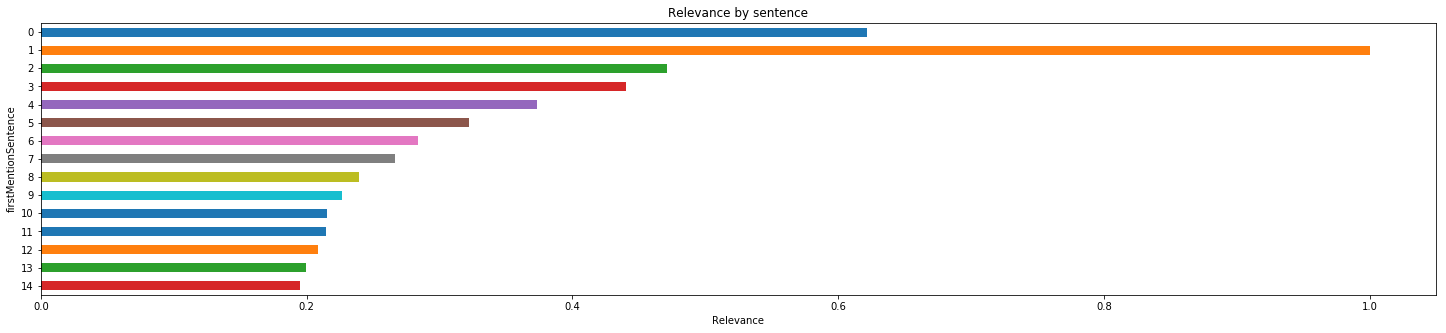

In [73]:
sentence_relevance = news_data.groupby('firstMentionSentence')['relevance'].mean()
plt.figure(figsize=(25,5))
sentence_relevance[:15].plot.barh()
plt.xlabel('Relevance')
plt.title('Relevance by sentence')
plt.gca().invert_yaxis()
del sentence_relevance

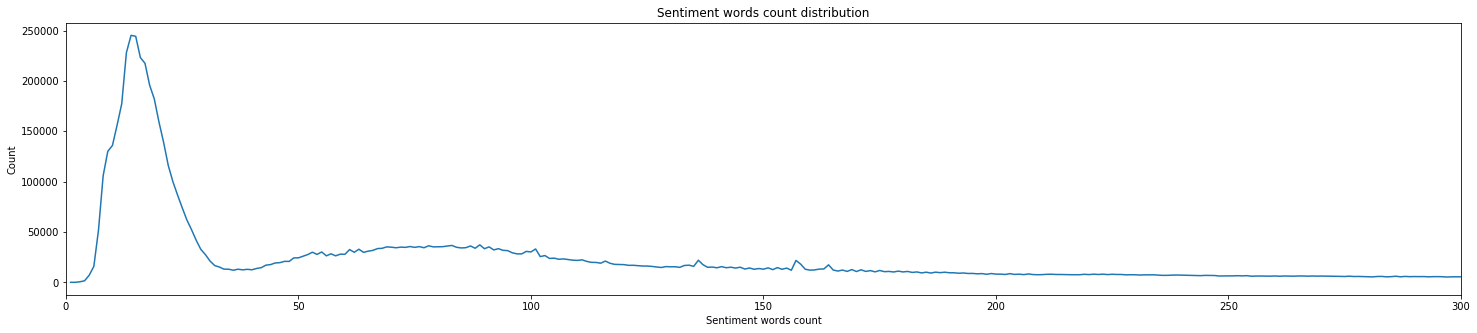

In [74]:
sentimentWordCount = news_data.groupby('sentimentWordCount')['sourceId'].count().reset_index()
plt.figure(figsize=(25,5))
plt.plot(sentimentWordCount['sentimentWordCount'], sentimentWordCount['sourceId'])
plt.xlim(0,300)
plt.xlabel('Sentiment words count')
plt.ylabel('Count')
plt.title('Sentiment words count distribution')
del sentimentWordCount

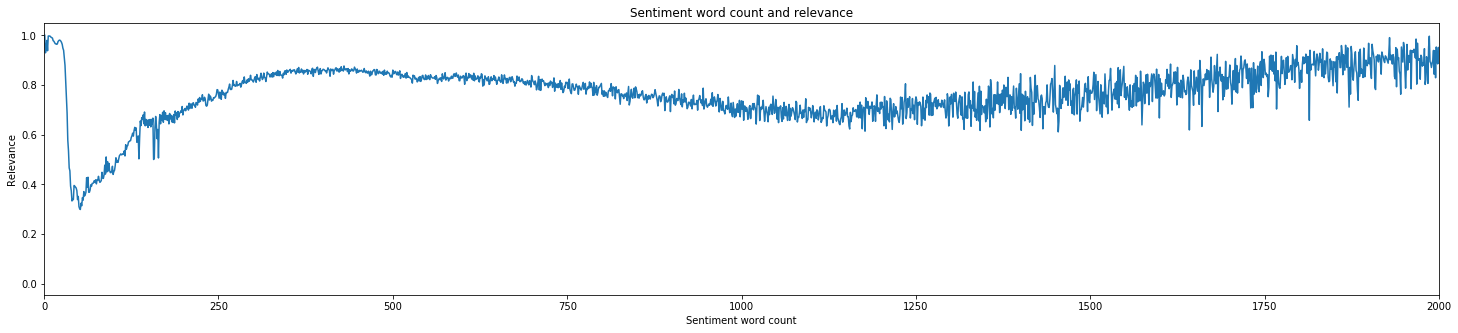

In [75]:
sentimentWordRatio = news_data.groupby('sentimentWordCount')['relevance'].mean()
plt.figure(figsize=(25,5))
plt.plot(sentimentWordRatio)
plt.xlim(0,2000)
plt.ylabel('Relevance')
plt.xlabel('Sentiment word count')
plt.title('Sentiment word count and relevance')
del sentimentWordRatio

Text(0.5,1,'Sentiment ratio distribution')

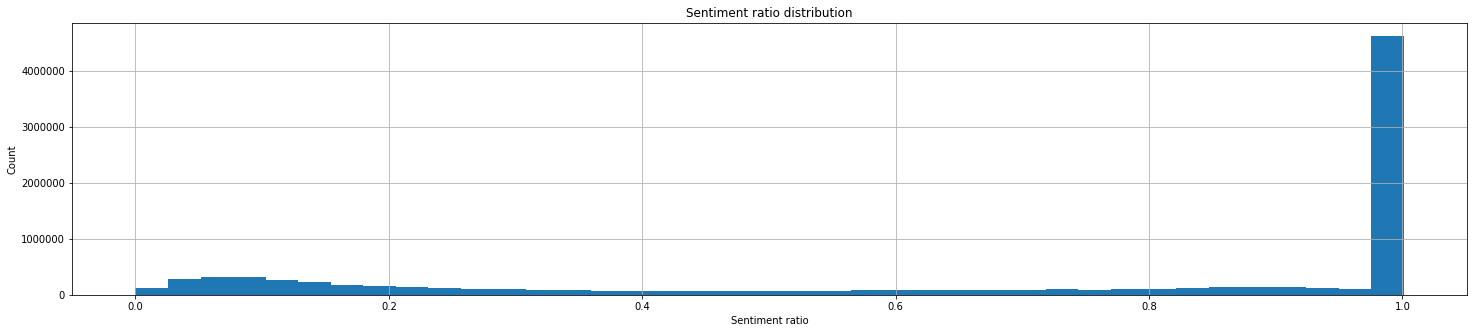

In [78]:
news_data['sentimentRatio'] = news_data['sentimentWordCount']/news_data['wordCount']
plt.figure(figsize=(25,5))
news_data['sentimentRatio'].hist(bins=np.linspace(0,1.001,40))
plt.xlabel('Sentiment ratio')
plt.ylabel('Count')
plt.title('Sentiment ratio distribution')

Text(0.5,1,'Relevance vs sentiment ratio of 10k samples')

<Figure size 1800x360 with 0 Axes>

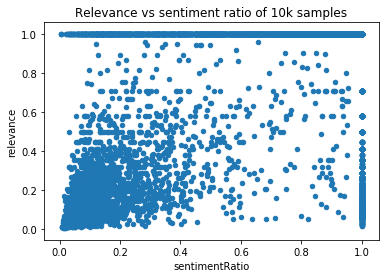

In [85]:
plt.figure(figsize=(25,5))
news_data.sample(n=10000, random_state=1).plot.scatter('sentimentRatio', 'relevance')
plt.title('Relevance vs sentiment ratio of 10k samples')

### 2.13 Asset Name

In [86]:
asset_name = news_data.groupby('assetName')['sourceId'].count()
print('Total number of assets: ',news_data['assetName'].nunique())

Total number of assets:  8902


Text(0.5,1,'Top 10 assets news')

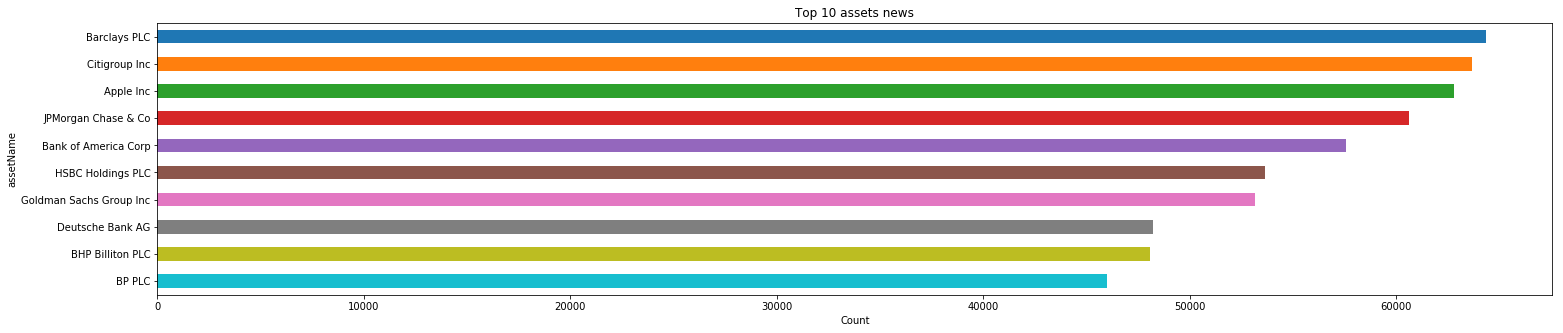

In [87]:
asset_name = asset_name.sort_values(ascending=False)
plt.figure(figsize=(25,5))
asset_name[:10].plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.title('Top 10 assets news')

In [89]:
for i, j in zip([-1, 0, 1], ['negative', 'neutral', 'positive']):
    df_sentiment = news_data.loc[news_data['sentimentClass'] == i, 'assetName']
    print(f'Top mentioned companies for {j} sentiment are:')
    print(df_sentiment.value_counts().head(5))
    print('')

Top mentioned companies for negative sentiment are:
Citigroup Inc              30823
JPMorgan Chase & Co        29129
Bank of America Corp       28197
Apple Inc                  26702
Goldman Sachs Group Inc    25044
Name: assetName, dtype: int64

Top mentioned companies for neutral sentiment are:
Barclays PLC         24898
HSBC Holdings PLC    23191
Deutsche Bank AG     20702
BHP Billiton PLC     18019
Rio Tinto PLC        16782
Name: assetName, dtype: int64

Top mentioned companies for positive sentiment are:
Barclays PLC             22855
Apple Inc                22770
General Electric Co      20055
Royal Dutch Shell PLC    18206
Citigroup Inc            18025
Name: assetName, dtype: int64



### 2.14 Remove Outliers and Plot Correlation

In [90]:
# Function to remove outliers
def remove_outliers(data_frame, column_list, low=0.02, high=0.98):
    temp_frame = data_frame
    for column in column_list:
        this_column = data_frame[column]
        quant_df = this_column.quantile([low,high])
        low_limit = quant_df[low]
        high_limit = quant_df[high]
        temp_frame[column] = data_frame[column].clip(lower=low_limit, upper=high_limit)
    return temp_frame

In [91]:
# Remove outlier
columns_outlier = ['takeSequence', 'bodySize', 'sentenceCount', 'wordCount', 'sentimentWordCount', 'firstMentionSentence','noveltyCount12H',\
                  'noveltyCount24H', 'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H', 'volumeCounts24H',\
                  'volumeCounts3D','volumeCounts5D','volumeCounts7D']
news_rmv_outlier = remove_outliers(news_data, columns_outlier)

Text(0.5,1,'Pair-wise correlation')

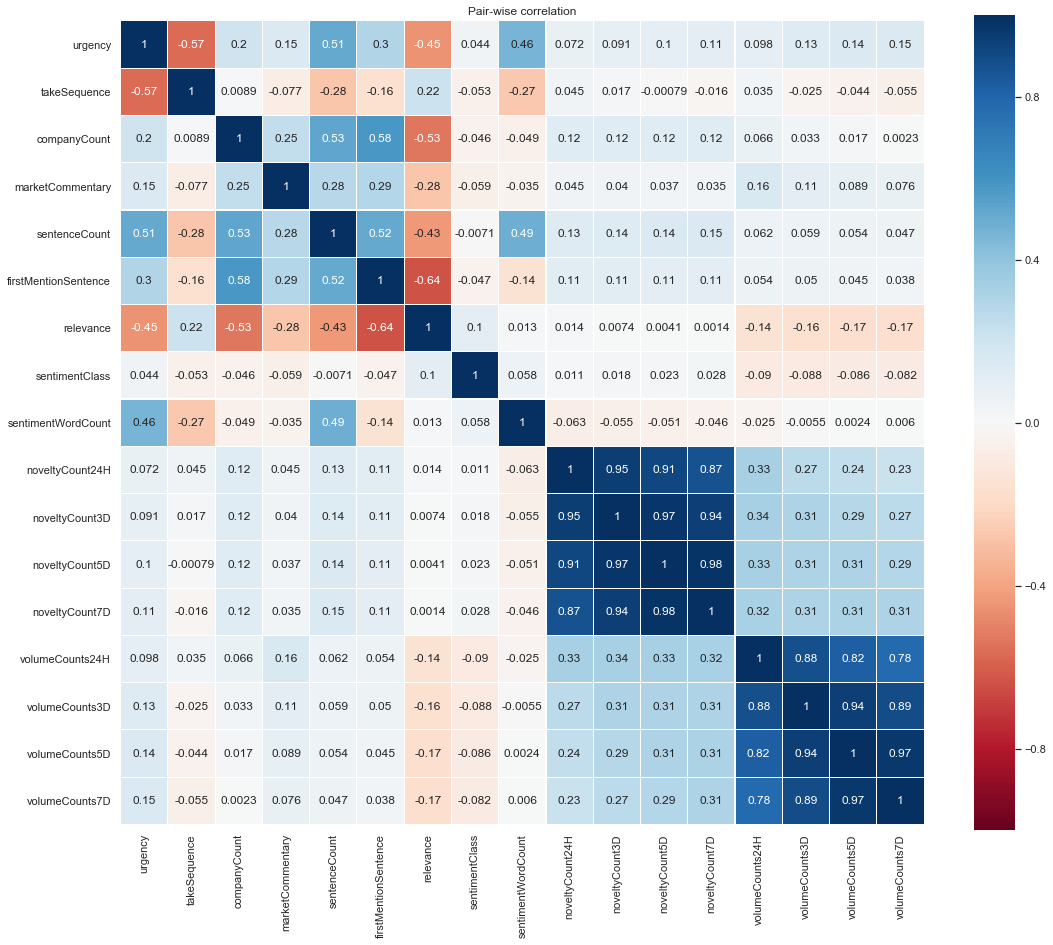

In [93]:
# Plot correlation
columns_corr = ['urgency', 'takeSequence', 'companyCount','marketCommentary','sentenceCount',\
           'firstMentionSentence','relevance','sentimentClass','sentimentWordCount','noveltyCount24H',\
           'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D','volumeCounts24H','volumeCounts3D','volumeCounts5D','volumeCounts7D']
colormap = plt.cm.RdBu
plt.figure(figsize=(18,15))
sns.heatmap(news_rmv_outlier[columns_corr].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Pair-wise correlation')